# **Home Credit Default Risk Prediction**
_**Predicting if an applicant is capable of repaying a loan**_

![](https://i.imgur.com/zN1zjlD.png)

Open in Google Colab and click the "Run" button to execute the code.

## **Introduction**

Loans have always been an important part of people’s lives for quite some time now. Each individual has different reasons for borrowing a loan. 

An existential problem for any Loan providers today is to find out the Loan applicants who are very likely to repay the loan. This way companies can avoid losses and incur huge profits.

**Predicting whether or not a person is able to repay their loan** is very important for lenders. Here’s actually where machine learning comes into the game.

### **Problem Statement**

The problem is that there are a lot of people who apply for loans in Banks and similar financial institutions whereas only a few of them get approved. This is primarily because of insufficient or non-existent credit histories of the applicant, whereas this population is taken advantage of by untrustworthy lenders.

In order to make sure that these applicants have a positive loan taking experience, Home Credit uses a lot of data (including telco data and transactional data) to predict the applicants' loan repayment abilities.
Improving on this overall process basically ensures that the clients capable of loan repayment do not have their applications rejected.

**_Predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan_**

### **Home Credit**

**Home Credit** is an international non-bank financial institution founded in 1997 in the Czech Republic and headquartered in Netherlands.The company operates in 9 countries and focuses on installment lending primarily to people with little or no credit history. As of 30 June 2020 the Group has cumulatively served over 135.4 million customers.

**Home Credit** offers easy, simple and fast loans for a range of Home Appliances, Mobile Phones, Laptops, Two Wheeler's , and varied personal needs.
The mission of Home Credit is to provide a positive and safe borrowing experience to the people mission is to provide a positive and safe borrowing experience to groups of people that traditional, mainstream banks and financial institutions typically refuse to serve. 

Home Credit hosted a **Kaggle challenge** to find out the loan applicants who is capable of repaying with little or no credit history by enabling them to borrow easily and safely, both online and offline. 

![](https://i.imgur.com/e42ATuj.png)

### **Business Objective and Constraints**

- The main objective is to identify the potential Defaulters based on the given data about the applicants.
- The probability of classification is essential because we want to be very sure when we classify someone as a Non-Defaulter, as the cost of making a mistake can be very high to the company.



### **Translate the business problem to a machine learning problem**

After identifying the business objectives, we can now formulate the machine learning problem statement:

This is a **Supervised Learning Classification Problem**, which contains the training data along with the Target Labels.The Labels represent whether a given applicant is a Defaulter or not. 

We can also identify that it is a **Binary Classification problem**,which contains just 2 classes, (1) and (0) 

(1) - The Applicant will repay loan on time

(0) - The Applicant will have difficulty repaying the loan on time

Thus, for a given application of a Applicant, using the given features, we have to predict the Target Label associated with that Applicant


![](https://i.imgur.com/mCPjFeX.png)

**This problem can be well described as** :

_“A binary classification problem where the inputs are various features describing the financial and behavioral history of the loan applicants, in order to predict whether the loan will be repaid or defaulted.”_

### **Evaluation Metrics**

The most important task in building any machine learning model is to evaluate its performance.Evaluation metrics are tied to machine learning tasks and there are different metrics for the tasks of classification and regression. 

The most commonly used [Performance metrics for classification problem](https://towardsdatascience.com/performance-metrics-for-classification-machine-learning-problems-97e7e774a007) are:

- Accuracy
- Confusion Matrix
- Precision, Recall, and F1 score
- ROC AUC
- Log-loss

Metrics like accuracy are good ways to evaluate classification models for balanced datasets, but if the data is imbalanced then other methods like F1-score, ROC/AUC perform better in evaluating the model performance.

### **Outline of the Project**

The project has been divided into five parts-


- **Data Preparation** 
        - Install Packages and Import Libraries
        - Download the Dataset
        - Data Overview

- **Exploratory Data Analysis** 
        - Distribution of Target variable
        - Exploring categorical columns
        - Exploring Numerical columns

- **Feature Engineering** - After exploring the data distributions, we can conduct feature engineering to prepare the data for model training. This includes operations like replacing outliers, imputing missing values, one-hot encoding categorical variables, and rescaling the data. Since there are number of relational databases, we can use extract, transform, load (ETL) processes using automated feature Engineering with Featuretools to connect the datasets. The additional features from these datasets will help improve the results over the base model (logistic regression).

- **Classifier Models**: Training, Prediction and Comparison - After the dataset is split into training and testing sets, we can correct the data imbalances by undersampling the majority class. Then, we can training the different classifier models (Logistic Regression, Random Forest, Decision Tree, XGBoost,LightGBM) and compare their performance on the test data using metrics like accuracy, F1-score and ROC AUC. After choosing the best classifier, we can use K-fold cross validation to select the best model. This will help us choose parameters that correspond to the best performance without creating a separate validation dataset.

- **Hyperparameter Tuning** - After choosing the binary classifier, we can tune the hyperparameters for improving the model results through grid search. The hyperparameter tuning process will use an objective function on the given domain space, and an optimization algorithm to give the results. 

## **Data Preparation**

### **Installing Packages and Importing Libraries**

In [ ]:
#Install required packages

!pip install opendatasets --update --quiet
!pip install os --update --quiet
!pip install warnings --update --quiet
!pip install numpy --update --quiet
!pip install pandas --update --quiet
!pip install matplotlib --update --quiet
!pip install seaborn --update --quiet
!pip install sklearn --update --quiet
!pip install featuretools --update --quiet
!pip install xgboost --update --quiet
!pip install lightgbm --update --quiet
!pip install hyperopt --update --quiet

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.9/597.9 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 24.7 MB/s eta 0:00:00


In [ ]:
# Import required libraries/packages

# To download the datasets
import opendatasets as od

# numpy and pandas for data manipulation (Basic matrix handling nad creating dataframes)
import numpy as np
import pandas as pd 

# To prevent Warnings
import warnings
warnings.filterwarnings("ignore")

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   

# File system manangement
import os


# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# import featuretools for automated feature engineering
import featuretools as ft 
from featuretools import selection

#Import sklearn helper metrics and transformations
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, auc, f1_score
from sklearn.model_selection import KFold, StratifiedKFold

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
import gc

### **Exploring the Dataset**

In [ ]:
kaggle_url = "https://www.kaggle.com/competitions/home-credit-default-risk/data"

#### **Loading Dataset**

In [ ]:
# Downloading the Dataset
od.download(kaggle_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pravz149
Your Kaggle Key: ··········


100%|██████████| 688M/688M [00:04<00:00, 147MB/s]



Extracting archive ./home-credit-default-risk/home-credit-default-risk.zip to ./home-credit-default-risk


In [ ]:
os.listdir("home-credit-default-risk")

['application_train.csv',
 'POS_CASH_balance.csv',
 'sample_submission.csv',
 'bureau_balance.csv',
 'installments_payments.csv',
 'application_test.csv',
 'bureau.csv',
 'HomeCredit_columns_description.csv',
 'previous_application.csv',
 'credit_card_balance.csv']

There are a total of 9 files: 

- 1 main file- application_train.csv for training (with target),
- 1 main file for testing - application_test.csv (without the target),
- 1 example submission file - sample_submission.csv, and 
- 6 other files containing additional information about each loan. 

Let's get started with the given train and test data.

#### **Data Profile**

**Data Source** - https://www.kaggle.com/competitions/home-credit-default-risk/overview

The dataset is obtained from Kaggle. There are 7 different sources of data available:
- **Application.csv (train/test)**: This is the main table broken into two files. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET which tells us the customer has repaid loan or not (1 is default, 0 is paid). The test dataset does not have a TARGET column. 

- **Bureau.csv**: This table contains other credit information of the borrower. Loans provided by other financial institutions that are reported to credit bureau are stored in this table. This table contains all other loans taken by client before the application date.

- **Bureau Balance.csv**: This table contains monthly balance of previous bureau of credits.

- **POS Cash Balance**: This table contains monthly balance of previous bureau of credits.

- **Credit Card Balance**: contains monthly balance snapshot of previous credit cards.

- **Previous Application**: All previous applications for Home Credit loans of clients who have loans in our sample. There is one row for each previous application related to loans in our data sample.

- **Installment Payments**: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample. Each row represents one payment of one instalment OR one instalment corresponding to one payment of one previous Home Credit related to loans in our sample.

![](https://i.imgur.com/PzS8VEg.png)

When working with large datasets, you may run into memory limitations that can slow down your code or cause it to crash. This is because DataFrames can take up a lot of memory, especially if you have multiple tables. The good news is that you can reduce the memory usage of your DataFrames without sacrificing important data or functionality.

fortunately, I've come across this interesting part of reducing memory usage of dataframes while checking out few machine learning notebooks in kaggle. Reducing the memory usage of your DataFrames is an important step in optimizing the performance of your machine learning projects. Since we have a large dataset of nearly 10 tables. Lets define a function to reduce the memory usage of the dataframes.

In [ ]:
## Function to Reduce the Memory Usage of a DataFrame

# Reference :- https://www.kaggle.com/rinnqd/reduce-memory-usage

def reduce_memory_usage(df):
  
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


**How the above function works??**

The above function reduces the memory usage of DataFrames. It works by first calculating the memory usage of the DataFrame, and then iterating over each column in the DataFrame. For each column, it checks the data type of the column and the minimum and maximum values in the column. Based on this information, it determines the smallest possible data type that can be used to store the data in the column without losing any information.

The function uses a number of numpy data types, including np.int8, np.int16, np.int32, np.int64, np.float16, np.float32, and np.float64, to store the data in the columns. It checks the minimum and maximum values in each column to determine which data type is appropriate.

For example, if the minimum and maximum values in a column are within the range of values that can be stored in an np.int8 data type, the function converts the data type of the column to np.int8 to reduce the memory usage of the DataFrame. Similarly, if the minimum and maximum values in a column are within the range of values that can be stored in an np.float16 data type, the function converts the data type of the column to np.float16 to reduce the memory usage of the DataFrame.

The function then calculates the memory usage of the DataFrame after optimizing the data types of the columns, and prints the percentage decrease in memory usage.

Overall, this function is a great way to reduce the memory usage of DataFrames, which can improve the performance of machine learning projects that use large datasets.

Now let's start exploring the datsets

#### **Train Data** 

In [ ]:
raw_df = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_train.csv'))
raw_df.shape

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


(307511, 122)

The above function of reducing memory usage has optimized the memory usage by 68% and thats great.


The training data has 3 Lakh+ observations (each one a separate loan) and 122 features (columns) including the **TARGET** column.

In [ ]:
raw_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Test Data**

In [ ]:
test_df = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_test.csv'))
test_df.shape

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


(48744, 121)

The test data is comparatively smaller and missing **TARGET** column.

In [ ]:
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis**

![](https://i.imgur.com/a7kEM2p.png)

**Exploratory Data Analysis (EDA)** 

The process of analyzing and understanding the characteristics of a dataset before building a machine learning model to find patterns, relationships, and anomalies in the data using statistical measures and visualizations.

Once data is imported, we can exploring the data and answer questions like-

- **How is the target distributed in the train data??**
- **How many features (categorical and  numerical) are present and how are they interlinked?**
- **What is the data quality? - Are there missing values? duplicate values? invalid values?** 

Let's answer these questions one by one

### **Application_train.csv**

Application data consists of static data for all applications and every row represents one loan.

In [ ]:
raw_df = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_train.csv'))
raw_df.shape

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


(307511, 122)

In [ ]:
raw_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### **Distribution of Target Variable**

Before we proceed with modelling, It is first important to understand the distribution of the target variable

In [ ]:
raw_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

There are 282686 customers who repaid loan on time  and 24825 customers who did not repay loan on time


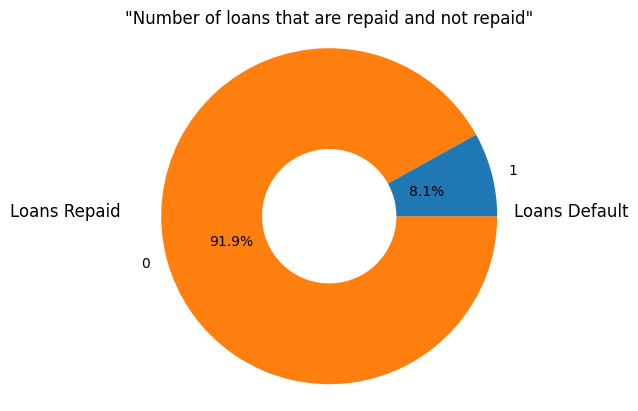

In [ ]:
import matplotlib.pyplot as plt

# calculate value counts of TARGET variable
target_counts = raw_df['TARGET'].value_counts()
paid = target_counts[0]
default  = target_counts[1]
print("There are {} customers who repaid loan on time  and {} customers who did not repay loan on time".format(paid,default))

# create donut plot
fig, ax = plt.subplots()
ax.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=360,counterclock=False, wedgeprops={'width': 0.6}, colors=[ '#ff7f0e','#1f77b4'])
ax.set_title('"Number of loans that are repaid and not repaid"')
ax.axis('equal')

# add index labels to the side of the plot
ax.text(-1.9, 0, 'Loans Repaid', fontsize=12)
ax.text(1.1, 0, 'Loans Default', fontsize=12)

plt.show()

This is an **imbalanced dataset**.

The application (train) dataset contains less than 10% records in which the target variable equals to 1. This means less than 10% of the clients have defaulted in the past. Defaulters are the minority class.Non-Defaulters are majority class.

This is good news for the company, but when building model, we have to design it in a way so that the algorithim will not be biased towards the category with high number of observations.

Thus, we would need to address this imbalance wherever required, as some ML algorithms are sensitive to data imbalance.

As mentioned earlier, if the data is imbalanced then methods like 
**ROC/AUC , F1-Score, precision/Recall, Log-Loss, F1-Score, Confusion Matrix** perform better in evaluating the model performance. Accuracy is usually not the right metric as the Accuracy would generally be biased to majority class.




Let's check the categorical and Numerical columns

In [ ]:
# Number of each type of column
raw_df.dtypes.value_counts()

float16    61
int8       37
object     16
float32     4
int32       2
int16       2
dtype: int64

The features of type object are categorical features . There are 16 categorical features present in the train_df. 



### **Exploring the Distribution of Data in Categorical Columns**



For Categorical Variables, we will be plotting the Bar Plots.The use of Bar will show the Number of unique categories present in a feature.
For each categorical feature there will be 2 bar plots:
- First, we will be plotting the distribution of each category in the whole data, in the first subplot.
- Next, in the second subplot, we will be plotting the Percentage of Defaulters from each category, i.e. with Target = 1.

Let's define a function to generate the plots for the given categorical feature.

In [ ]:
def plot_bar_gen(feature,orientation_horizontal = True):


    total_1 = raw_df[feature].value_counts()
    total_1_df = pd.DataFrame({feature : total_1.index, 'Number Of Loans' : total_1.values})

    # Calculate the percentage of target=1 per category value (The percentage of defaulters)
    cat_perc = raw_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()

    
    if len(raw_df[feature].unique())<10:
        plt.figure(figsize=(18,3))
    elif len(raw_df[feature].unique())>=10:
        plt.figure(figsize=(30,10))
    
    plt.subplot(121)
    sns.barplot(y = feature, x="Number Of Loans",data=total_1_df)
    plt.xlabel('Distribution of Loans', fontsize=15)
    plt.ylabel(feature, fontsize=12)

    plt.subplot(122)
    sns.barplot(y = feature, x="TARGET",data=cat_perc)
    plt.xlabel('Percentage of Loans defaulted', fontsize=15)
    plt.ylabel(feature, fontsize=12)

    plt.subplots_adjust(wspace = 0.5)
    plt.show();

If we carefully observe the dataset and features there are also other features that are categorical but being recognized as numeric columns. so we have to manually enter the col names

In [ ]:
# List of categorical columns
categorical_columns = raw_df.dtypes[raw_df.dtypes == 'object'].index.tolist()+['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
                       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY'
                       ,'LIVE_CITY_NOT_WORK_CITY'] + ['FLAG_DOCUMENT_' + str(i) for i in range(2,22)]  

In [ ]:
print(categorical_columns)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUM

First let's explore the basic categorical features **NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,FAMILY_STATUS,NAME_HOUSING_TYPE** to understand more about the loans distribution 





##### **Distribution of 'NAME_CONTRACT_TYPE'**

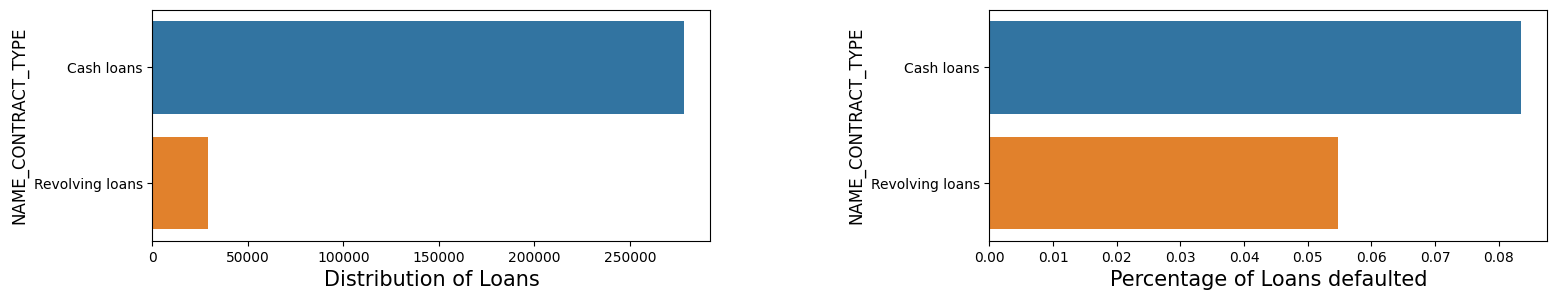

In [ ]:
plot_bar_gen('NAME_CONTRACT_TYPE')

- Most of the people are taking loans in the form of cash loans instead of revolving loans such as credit cards.

##### **Distribution of 'CODE_GENDER'**

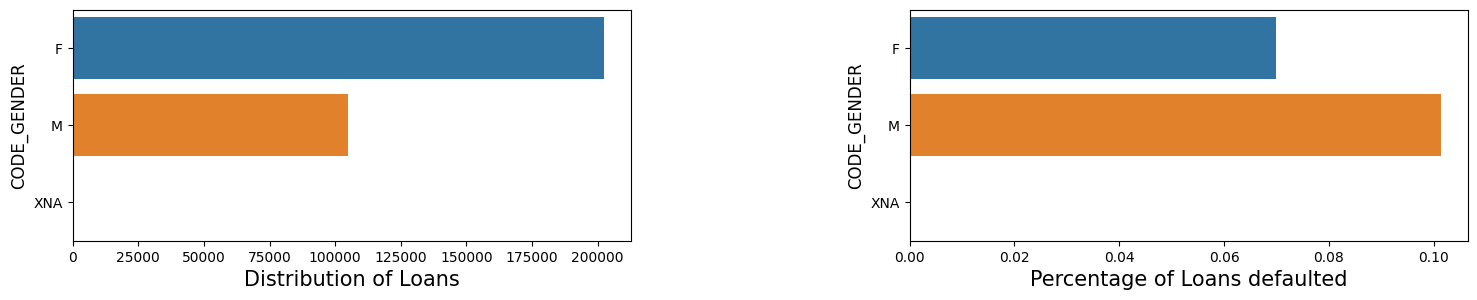

In [ ]:
plot_bar_gen('CODE_GENDER')

- Women took much more number of loans as compared to Men. Women took a total of 202K+ loans, Men only took 105K+ loans.It is interesting to see that women are able to repay their loans compared to men.The loans defaulted by men are 10% and the loans defaulted by women are 7%

##### **Distribution of 'FLAG_OWN_CAR'**

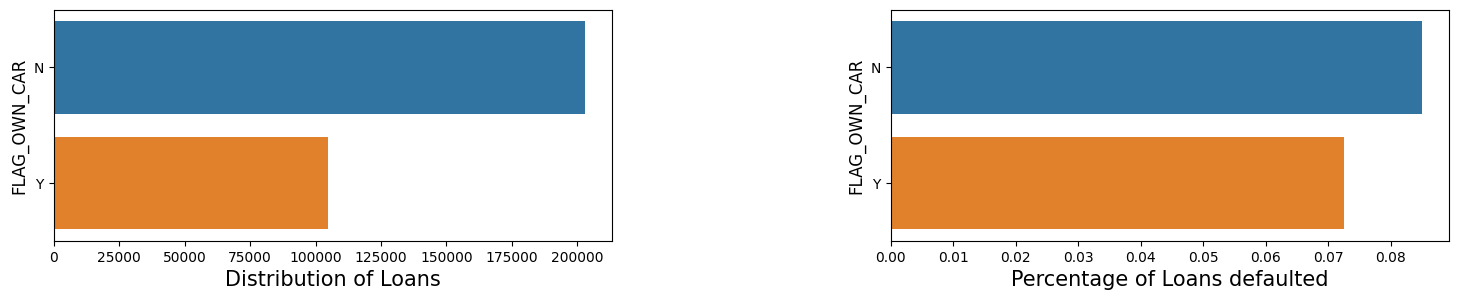

In [ ]:
plot_bar_gen('FLAG_OWN_CAR')

- Most of the applicants who took loans do not own a car.However, there is not much difference in the loan repayment status for the customer based on this information (8.5% and 7.2% respectively). We can say that this feature is not very useful in predicting the default loans.

##### **Distribution of 'FLAG_OWN_REALTY'**

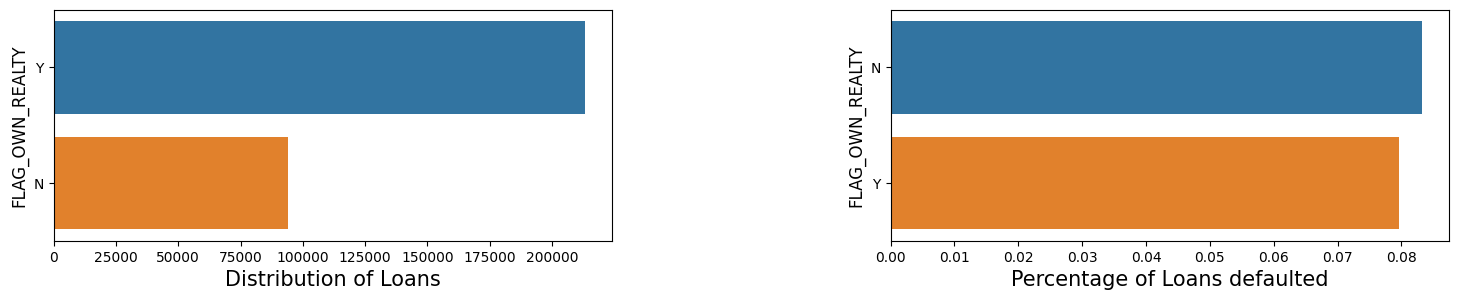

In [ ]:
plot_bar_gen('FLAG_OWN_REALTY')

- It is again suprising to see that most of the applicants who took loans own a flat/house.However, again, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). We can say that this feature is not very useful in predicting the default loans.

##### **Distribution of 'NAME_TYPE_SUITE'**

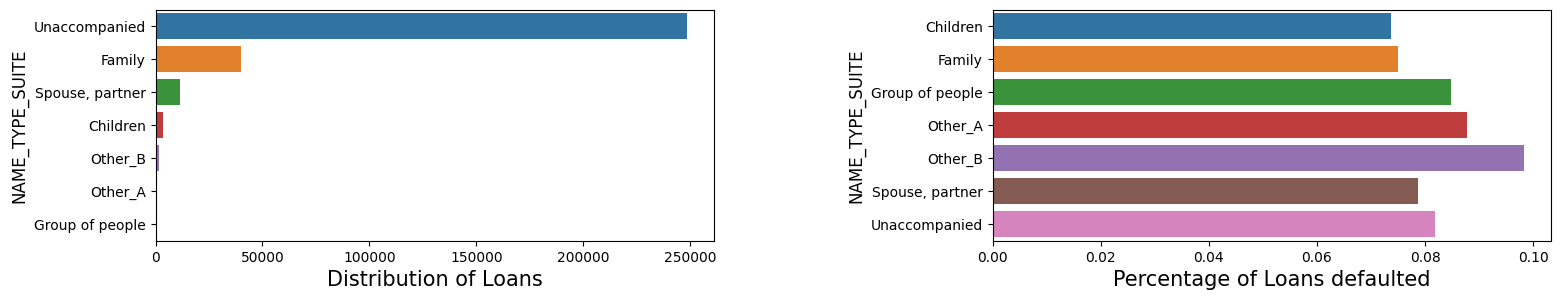

In [ ]:
plot_bar_gen('NAME_TYPE_SUITE')

- Approximately 92% of the time the bank finds the 
unaccompanied client to be capable of loan repayment whereas the remaining 8% of the time, the client is not capable of the same.There is a lot of variability in terms of accompany to the loan repayment.

##### **Distribution of 'NAME_FAMILY_STATUS'**

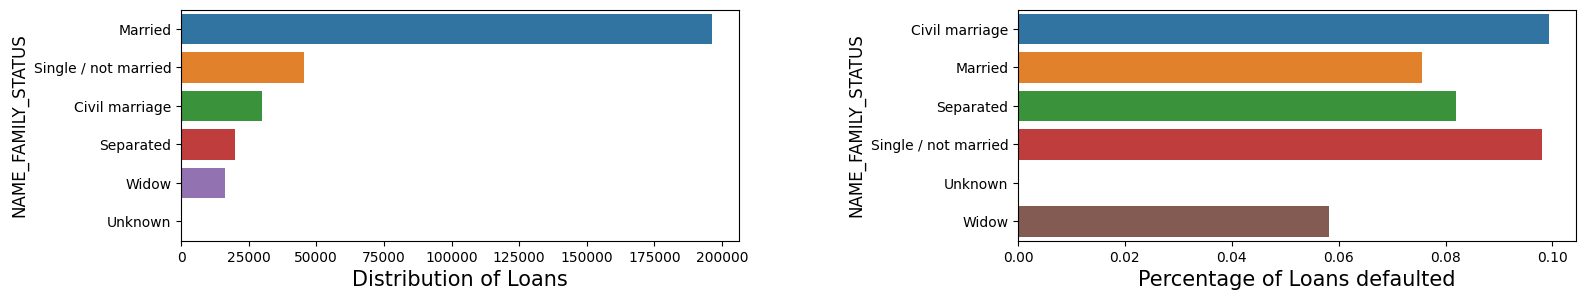

In [ ]:
plot_bar_gen('NAME_FAMILY_STATUS')

- Married people applied for the most number of loans and the number of people deemed incapable of repayment is also the higher.

##### **Distribution of 'NAME_HOUSING_TYPE'**





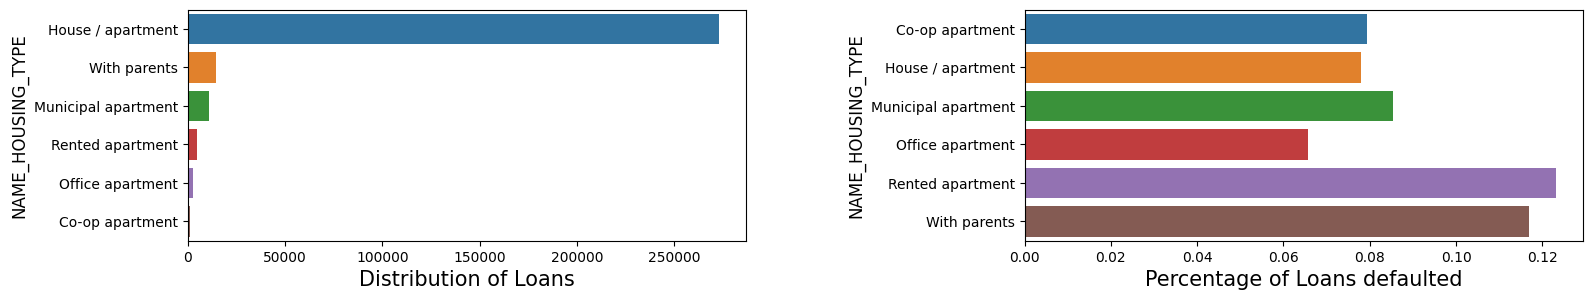

In [ ]:
plot_bar_gen('NAME_HOUSING_TYPE')

- People living in a House/Apartment applied for the most number of loans and the number of people deemed incapable of repayment in this case is also the higher. It is also to be noted that people living in rented apartment and with parents have the highest chance of default.

Since, there are 51 categorical and we already explored the basic features let's quickly generate the top correlated features with the TARGET column

In [ ]:
#A code snippet generated from chatGPT to find the correlation of categorical features with TARGET column
from scipy.stats import chi2_contingency

# target column
target_col = 'TARGET'

# create an empty dataframe to store the correlation values
corr_df = pd.DataFrame(columns=categorical_columns)

# loop through each categorical column
for col in categorical_columns:

    # create a contingency table of the categorical column and the target column
    contingency_table = pd.crosstab(raw_df[col], raw_df[target_col])
    
    # calculate the chi-square test statistic and p-value
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # calculate the Cramer's V statistic
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    # store the correlation value in the dataframe
    corr_df[col] = [cramers_v]

# Print the top 5 highest correlation values
print('Top 10 highest correlations with TARGET:')
print(corr_df.T.nlargest(15, 0, keep='all'))

# Print the top 5 lowest correlation values
#print('\nTop 10 lowest correlations with TARGET:')
#print(corr_df.T.nsmallest(10, 0, keep='all'))


Top 10 highest correlations with TARGET:
                                    0
OCCUPATION_TYPE              0.081020
ORGANIZATION_TYPE            0.071048
NAME_INCOME_TYPE             0.063667
REGION_RATING_CLIENT_W_CITY  0.060925
REGION_RATING_CLIENT         0.058855
NAME_EDUCATION_TYPE          0.057458
CODE_GENDER                  0.054661
REG_CITY_NOT_WORK_CITY       0.050948
FLAG_EMP_PHONE               0.045931
REG_CITY_NOT_LIVE_CITY       0.044337
FLAG_DOCUMENT_3              0.044297
NAME_FAMILY_STATUS           0.040311
NAME_HOUSING_TYPE            0.036761
LIVE_CITY_NOT_WORK_CITY      0.032453
NAME_CONTRACT_TYPE           0.030823


Some of the highly correlated Category pairs are:
- We can also see some correlation between the ORGANIZATION_TYPE,OCCUPATION_TYPE,INCOME_TYPE with the TARGET column
- REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT - This is understandable as they would more or less tell a similar story.
- We find that the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE, REG_CITY_NOT_WORK_CITY are some of the highest correlated categories with the TARGET variable. 

These maybe important in the classification task, and would need further EDA

##### **Distribution of 'OCCUPATION_TYPE'**

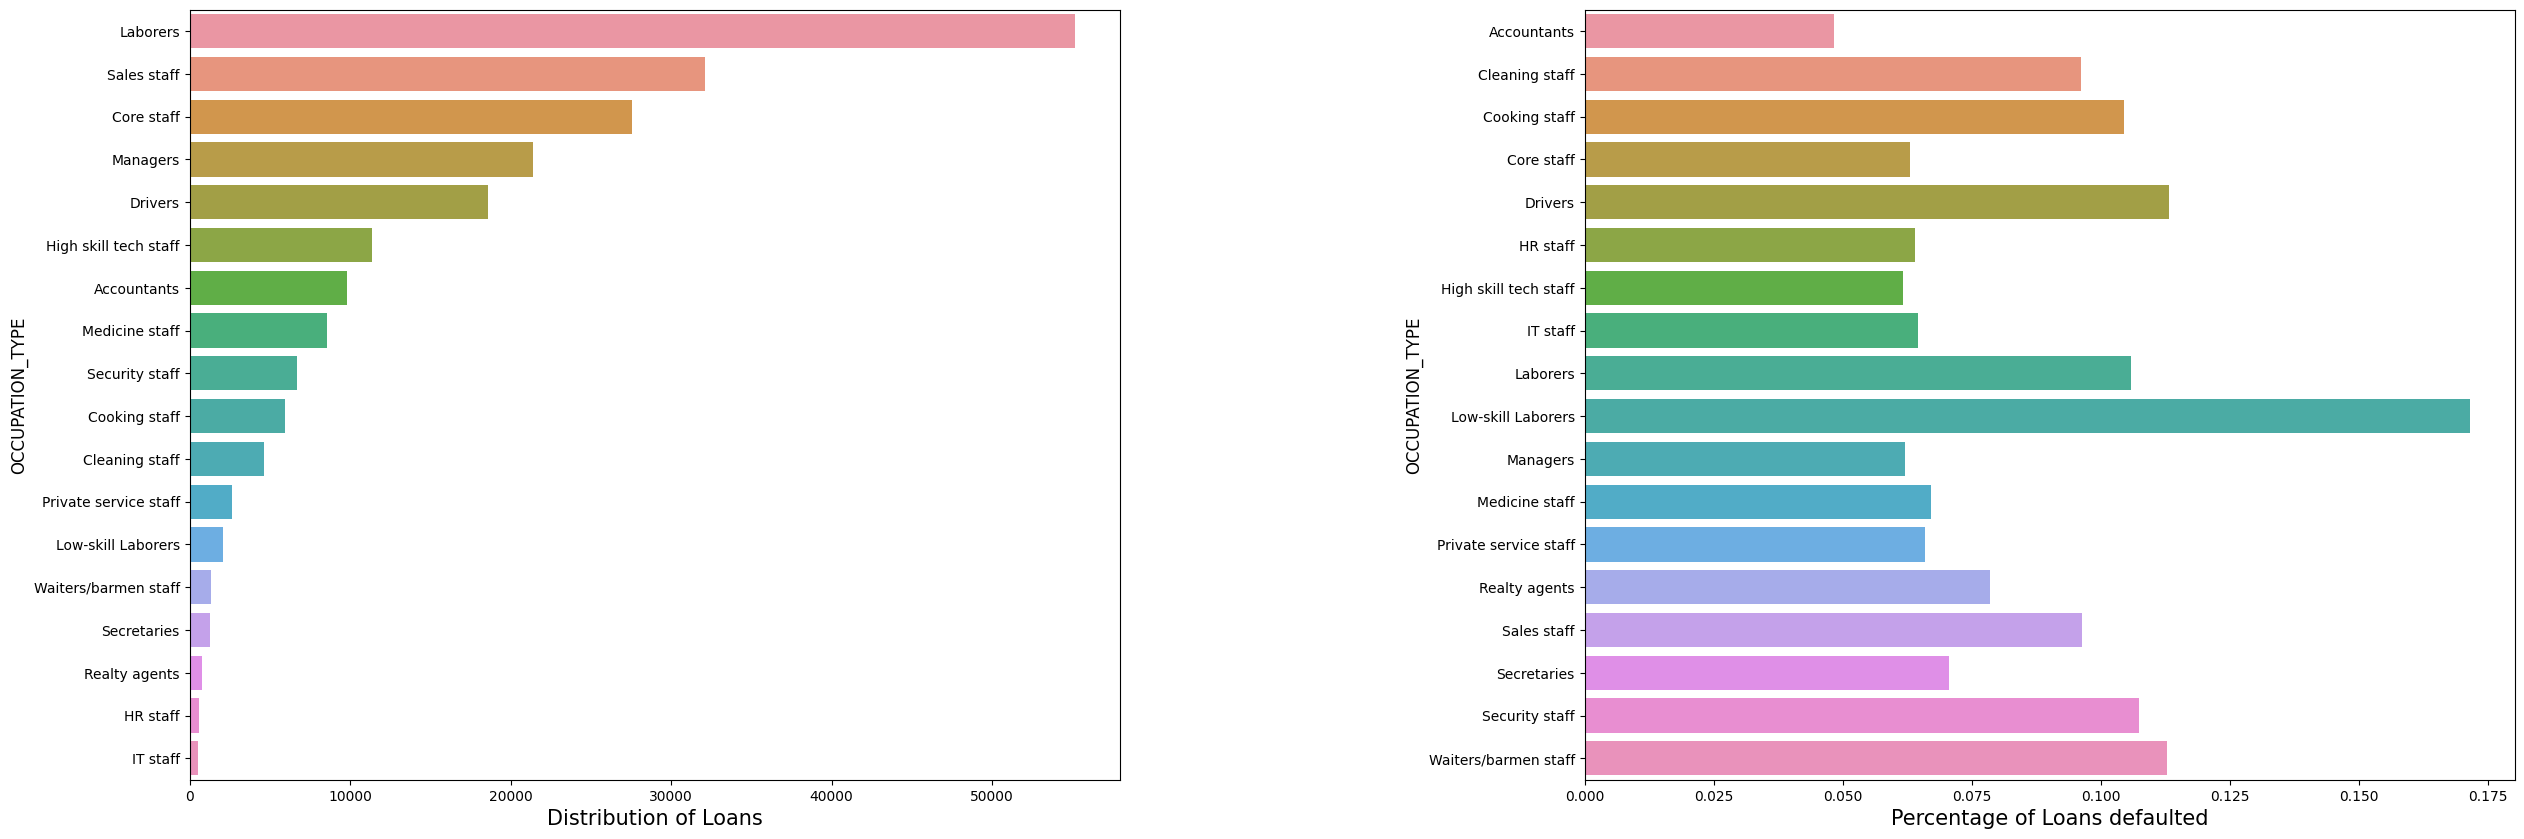

In [ ]:
plot_bar_gen('OCCUPATION_TYPE')

- Out of all the possible Occupation Types,Laborers applied for the most number of loans and 10% of the highest are not capable of paying loans.Drivers,waiters/barmen,low-skill laborers,securitystaff,cooking staff are least capable of repayment

##### **Distribution of 'ORGANIZATION_TYPE**



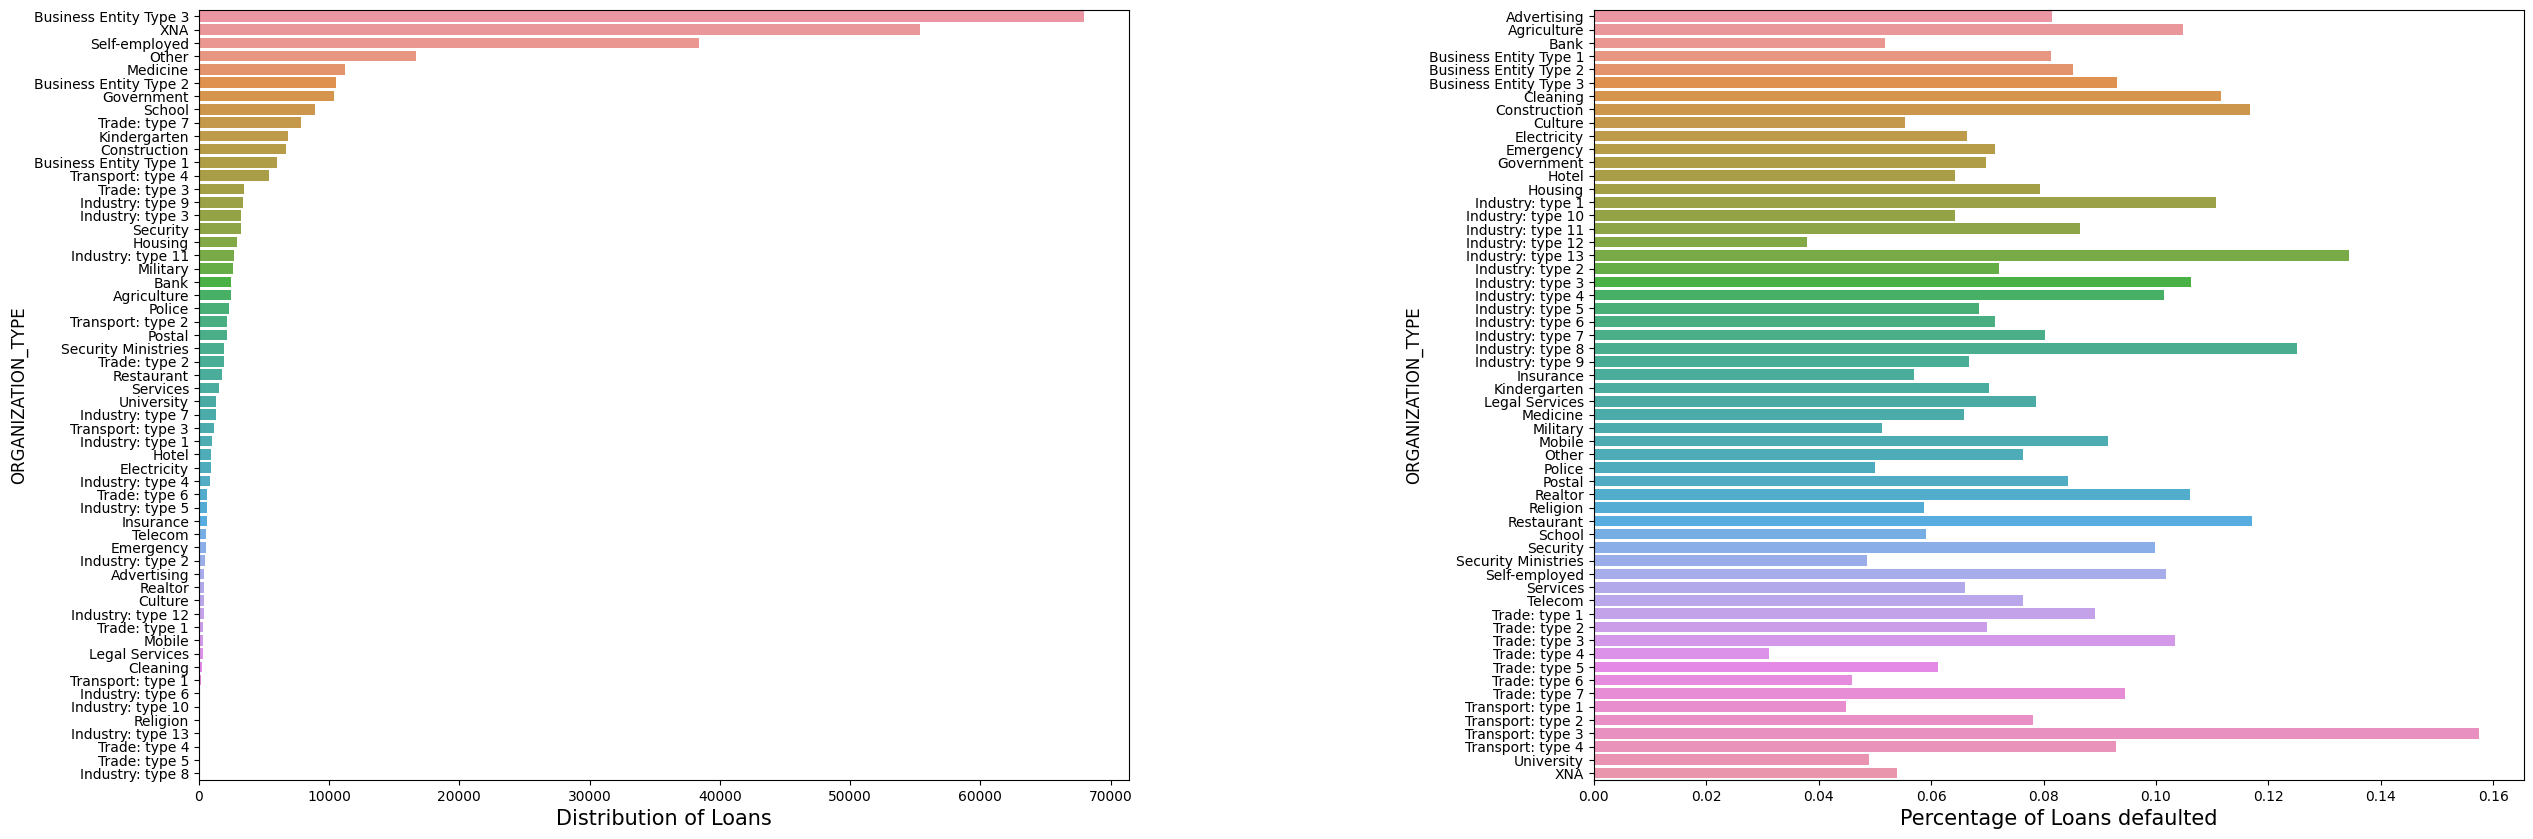

In [ ]:
plot_bar_gen('ORGANIZATION_TYPE')

- Business people and XNA (No information provided) are the highest number of applicants but Business People and Self-Employed applicants have some of the highest default rate.

##### **Distribution of 'NAME_INCOME_TYPE'**

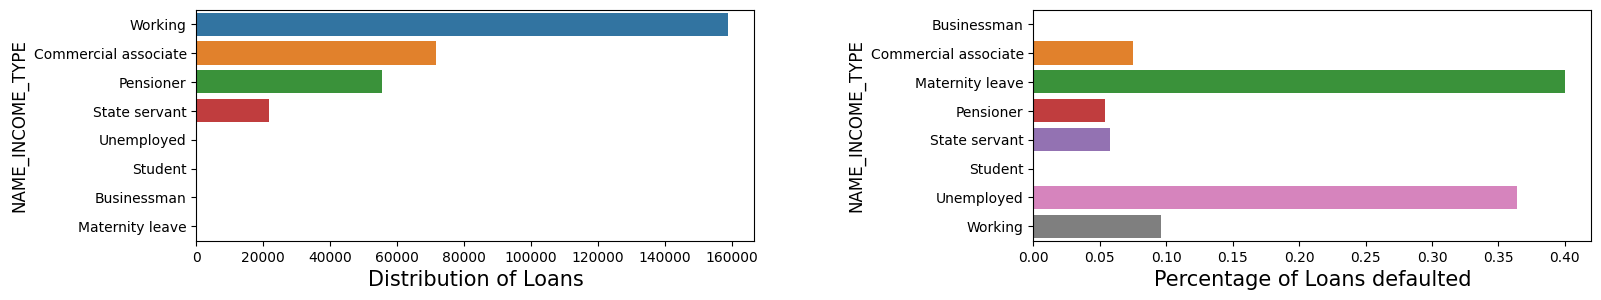

In [ ]:
plot_bar_gen('NAME_INCOME_TYPE')

- The people who are working take the most number of loans compared to other categories. We have very little datapoints related to Unemployed people, Students, Businessmen and women on Maternity leave..One interesting observation over here is the fact that whatever loans the students and businessmen have applied to, they have been deemed capable of repayment of the same.

##### **Distribution of 'NAME_EDUCATION_TYPE'**

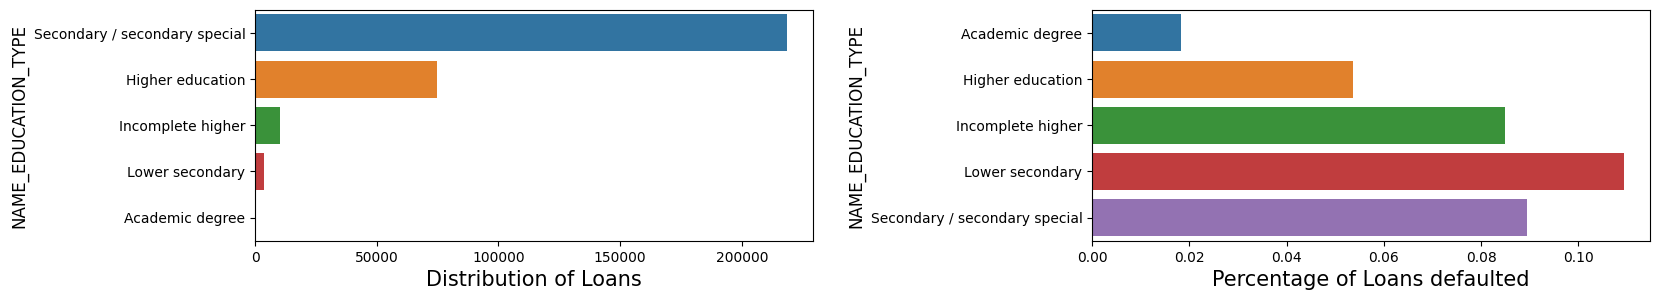

In [ ]:
plot_bar_gen('NAME_EDUCATION_TYPE')

- People with Secondary/Secondary Special as the highest level of education applied for most number of loans. However, the default percentage is not very different across various education levels. But due to the higher percent of secondary school candidates deemed incapable of repayment has to be considered.

##### **Distribution of 'WEEKDAY_APPR_PROCESS_START'**

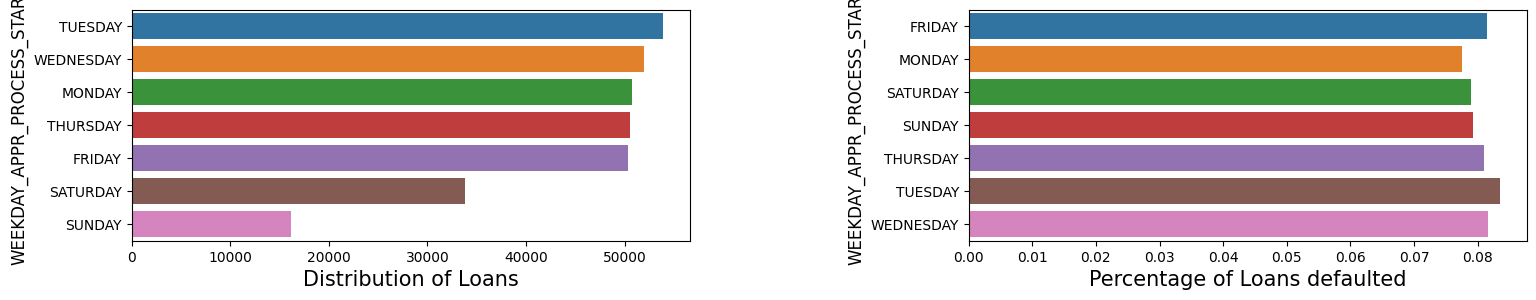

In [ ]:
plot_bar_gen('WEEKDAY_APPR_PROCESS_START')

The number of applications are spread almost uniformly throughout the weekdays (Monday-Friday) (approx. 50K applications per day), whereas the number of applications is very low on a Sunday.This tells us the acticity per day but, doesnt play any role in predicting the default loan. so this feature doesnt make much difference.

In [ ]:
def plot_bar_gen_vertical(feature):

    total_1 = raw_df[feature].value_counts()
    total_1_df = pd.DataFrame({feature : total_1.index, 'Number Of Loans' : total_1.values})

    # Calculate the percentage of target=1 per category value (The percentage of defaulters)
    cat_perc = raw_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    plt.figure(figsize=(18,3))

    plt.subplot(121)
    sns.barplot(x = feature, y="Number Of Loans",data=total_1_df)
    plt.xlabel('Distribution of Loans', fontsize=15)
    plt.ylabel(feature, fontsize=12)

    plt.subplot(122)
    sns.barplot(x = feature, y="TARGET",data=cat_perc)
    plt.xlabel('Percentage of Loans defaulted', fontsize=15)
    plt.ylabel(feature, fontsize=12)

    plt.subplots_adjust(wspace = 0.5)
    plt.show();

##### **Distribution of 'CNT_CHILDREN'**





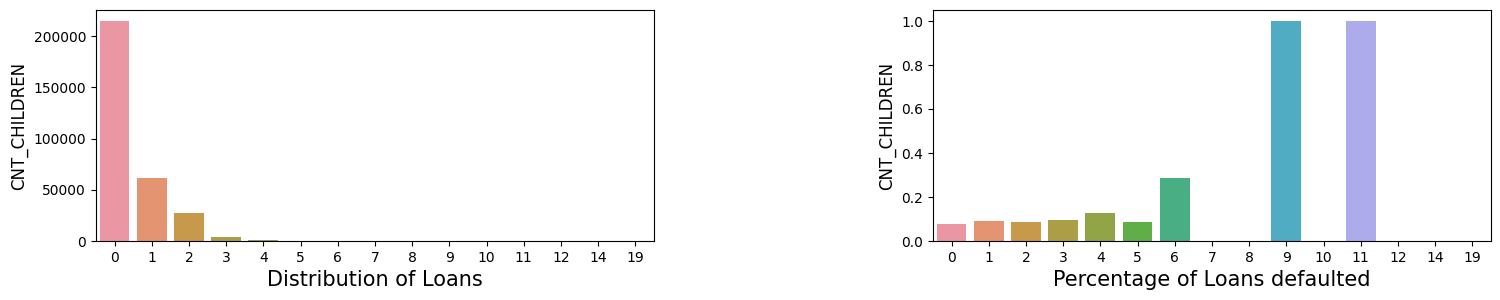

In [ ]:
plot_bar_gen_vertical('CNT_CHILDREN')

**Obsevation** - The applicants having no children take considerably higher number of loans.However,There is not much difference in the loan repayment status for the customer based on this information. We can say that this feature is not very useful.

##### **Distribution of 'REGION_RATING_CLIENT_W_CITY' and 'REGION_RATING_CLIENT'**


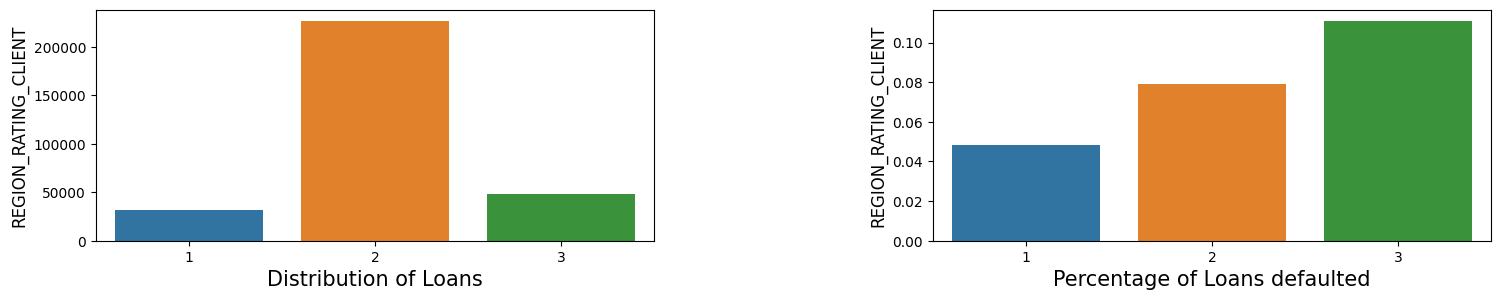

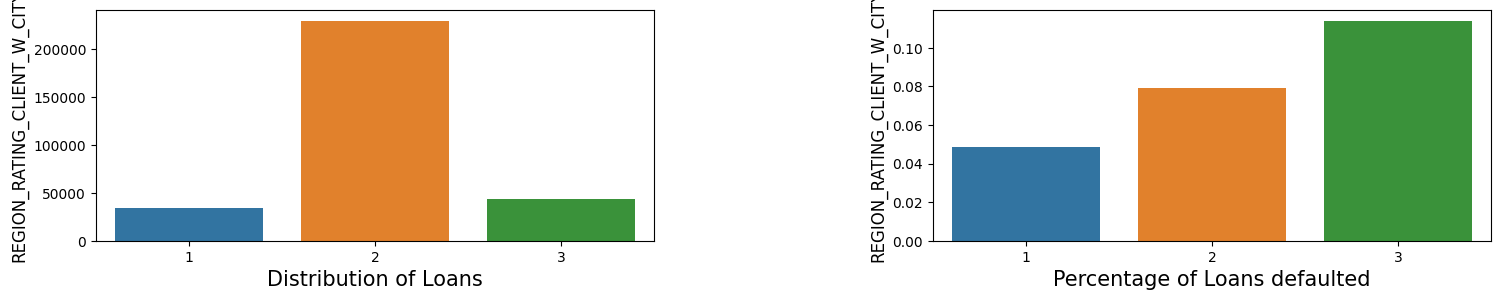

In [ ]:
plot_bar_gen_vertical('REGION_RATING_CLIENT')
plot_bar_gen_vertical('REGION_RATING_CLIENT_W_CITY')

Both of the features have a similar distribution and are highly correlated. We can remove one of the feature later to reduce the complexity of the model

**Observation**- 
- From the first subplot, we see that most of the applicants have a region rating of 2. Very few applicants have a region rating of 1 and some have a rating of 3.
- Among the Defaulters, it is seen that most of the applicants have a region rating of 3  which is comparably higher to the other two ratings, i.e. clients with rating of 1 have a default percentage of just 5%.

##### **Distribution of 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY' and 'LIVE_CITY_NOT_WORK_CITY'**

These columns include flags whether if the the client's permanent address matches with his Contact Address or Work Address or not at region level

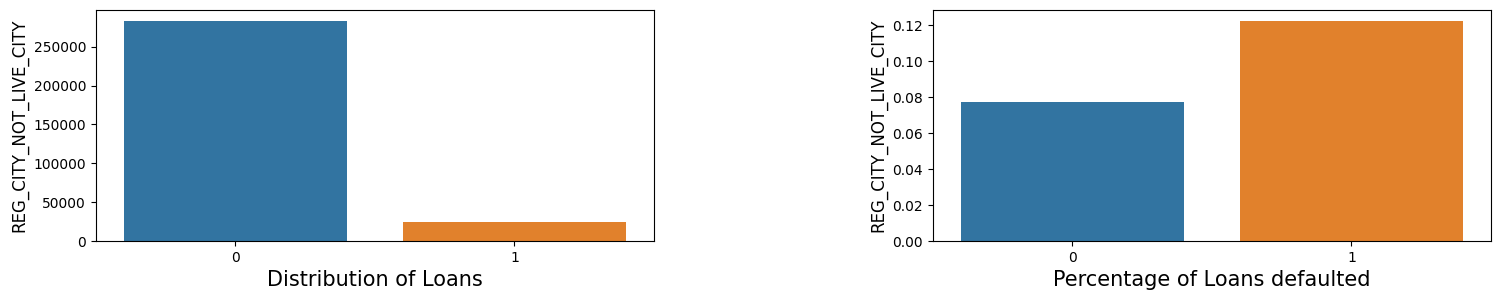

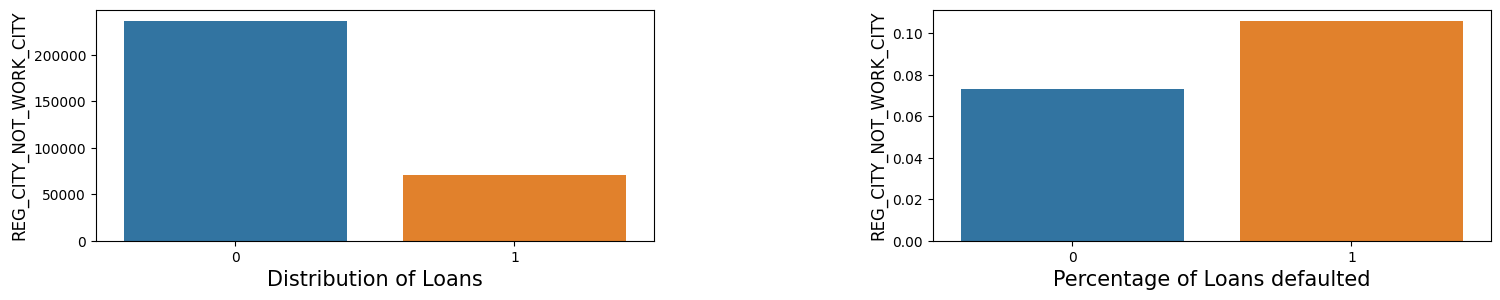

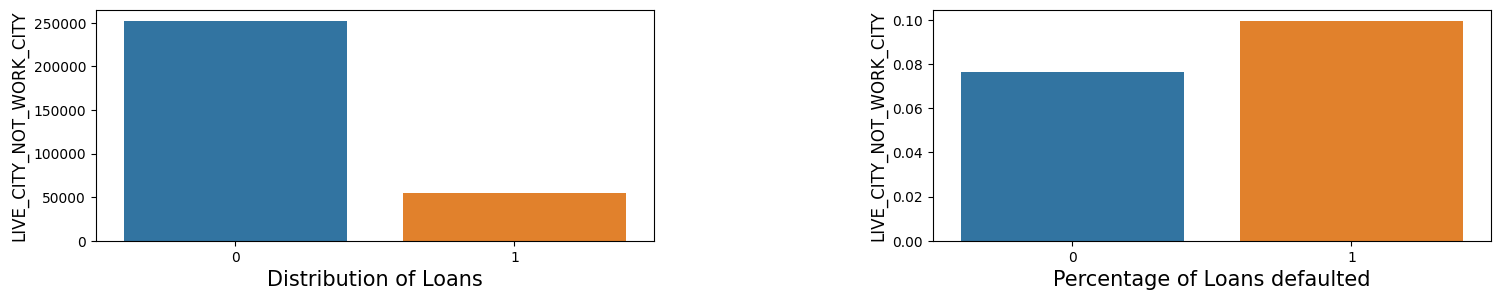

In [ ]:
plot_bar_gen_vertical('REG_CITY_NOT_LIVE_CITY')
plot_bar_gen_vertical('REG_CITY_NOT_WORK_CITY')
plot_bar_gen_vertical('LIVE_CITY_NOT_WORK_CITY')


**Observations**-

Of all the applicants there are only a minority of applicants whose addresses do not match.
- Firstly, there are less than 10% of  people who have different permanent address from their contact address at region level.
- Secondly, there are around 20% people who have different permanent address from their work address at region level. This higher number is explainable, because it is possible that they work in different region as compared to their permanent address.
- Lastly, there are around 15-20% people who have different permanent address from their contact address at city level.

- For all the cases it is seen that the Defaulting tendency of those people who have different addresses is higher than those who have same address. This means that somewhere, this difference in address may suggest Defaulting Risk.

##### **Distribution of 'FLAG_EMP_PHONE'**


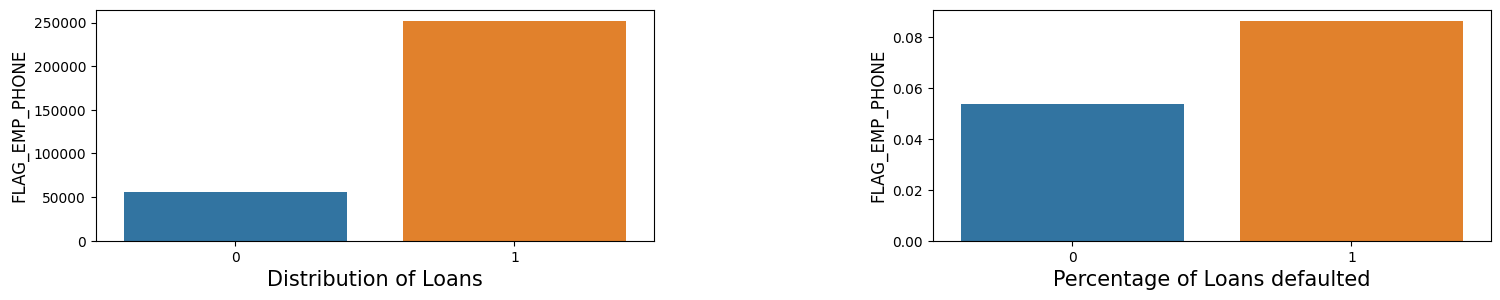

In [ ]:
plot_bar_gen_vertical('FLAG_EMP_PHONE')

- we see that most of the applicants do not provide their Work Phone Number.
- It can also be seen that the Default tendency for those who do provide Work Phone Number is more than those who do not provide Work Phone Number.

This is characteristic could be attributed to the fact that the Defaulters might be providing their Work Phone Numbers so that they don't get disturbed on their personal phone.

##### **Distribution of 'FLAG_DOCUMENT_3'**


This columns contains the flag about a document that was to be submitted by the applicant. It's value is 0 if the client had provided the document and 1 if not.



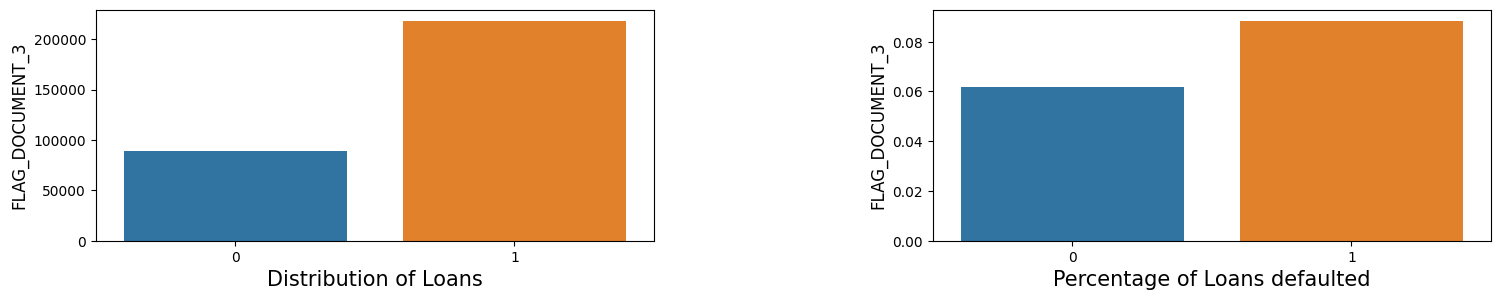

In [ ]:
plot_bar_gen_vertical('FLAG_DOCUMENT_3')

- we see that most of the clients hadn't provided this document 
From the second subplot.
- we see that those who didnt provide this document had a higher defaulting rate than those who did. 

### **Exploring the Distribution of Data in Numerical Columns**


In [ ]:
numeric_cols = raw_df.drop(columns=categorical_columns, axis=1)
len(numeric_cols.columns)

72

In [ ]:
print(numeric_cols.columns)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'AP

Since there are too many features in the dataset . lets quickly see which features are in correlation with the target column.


<Axes: >

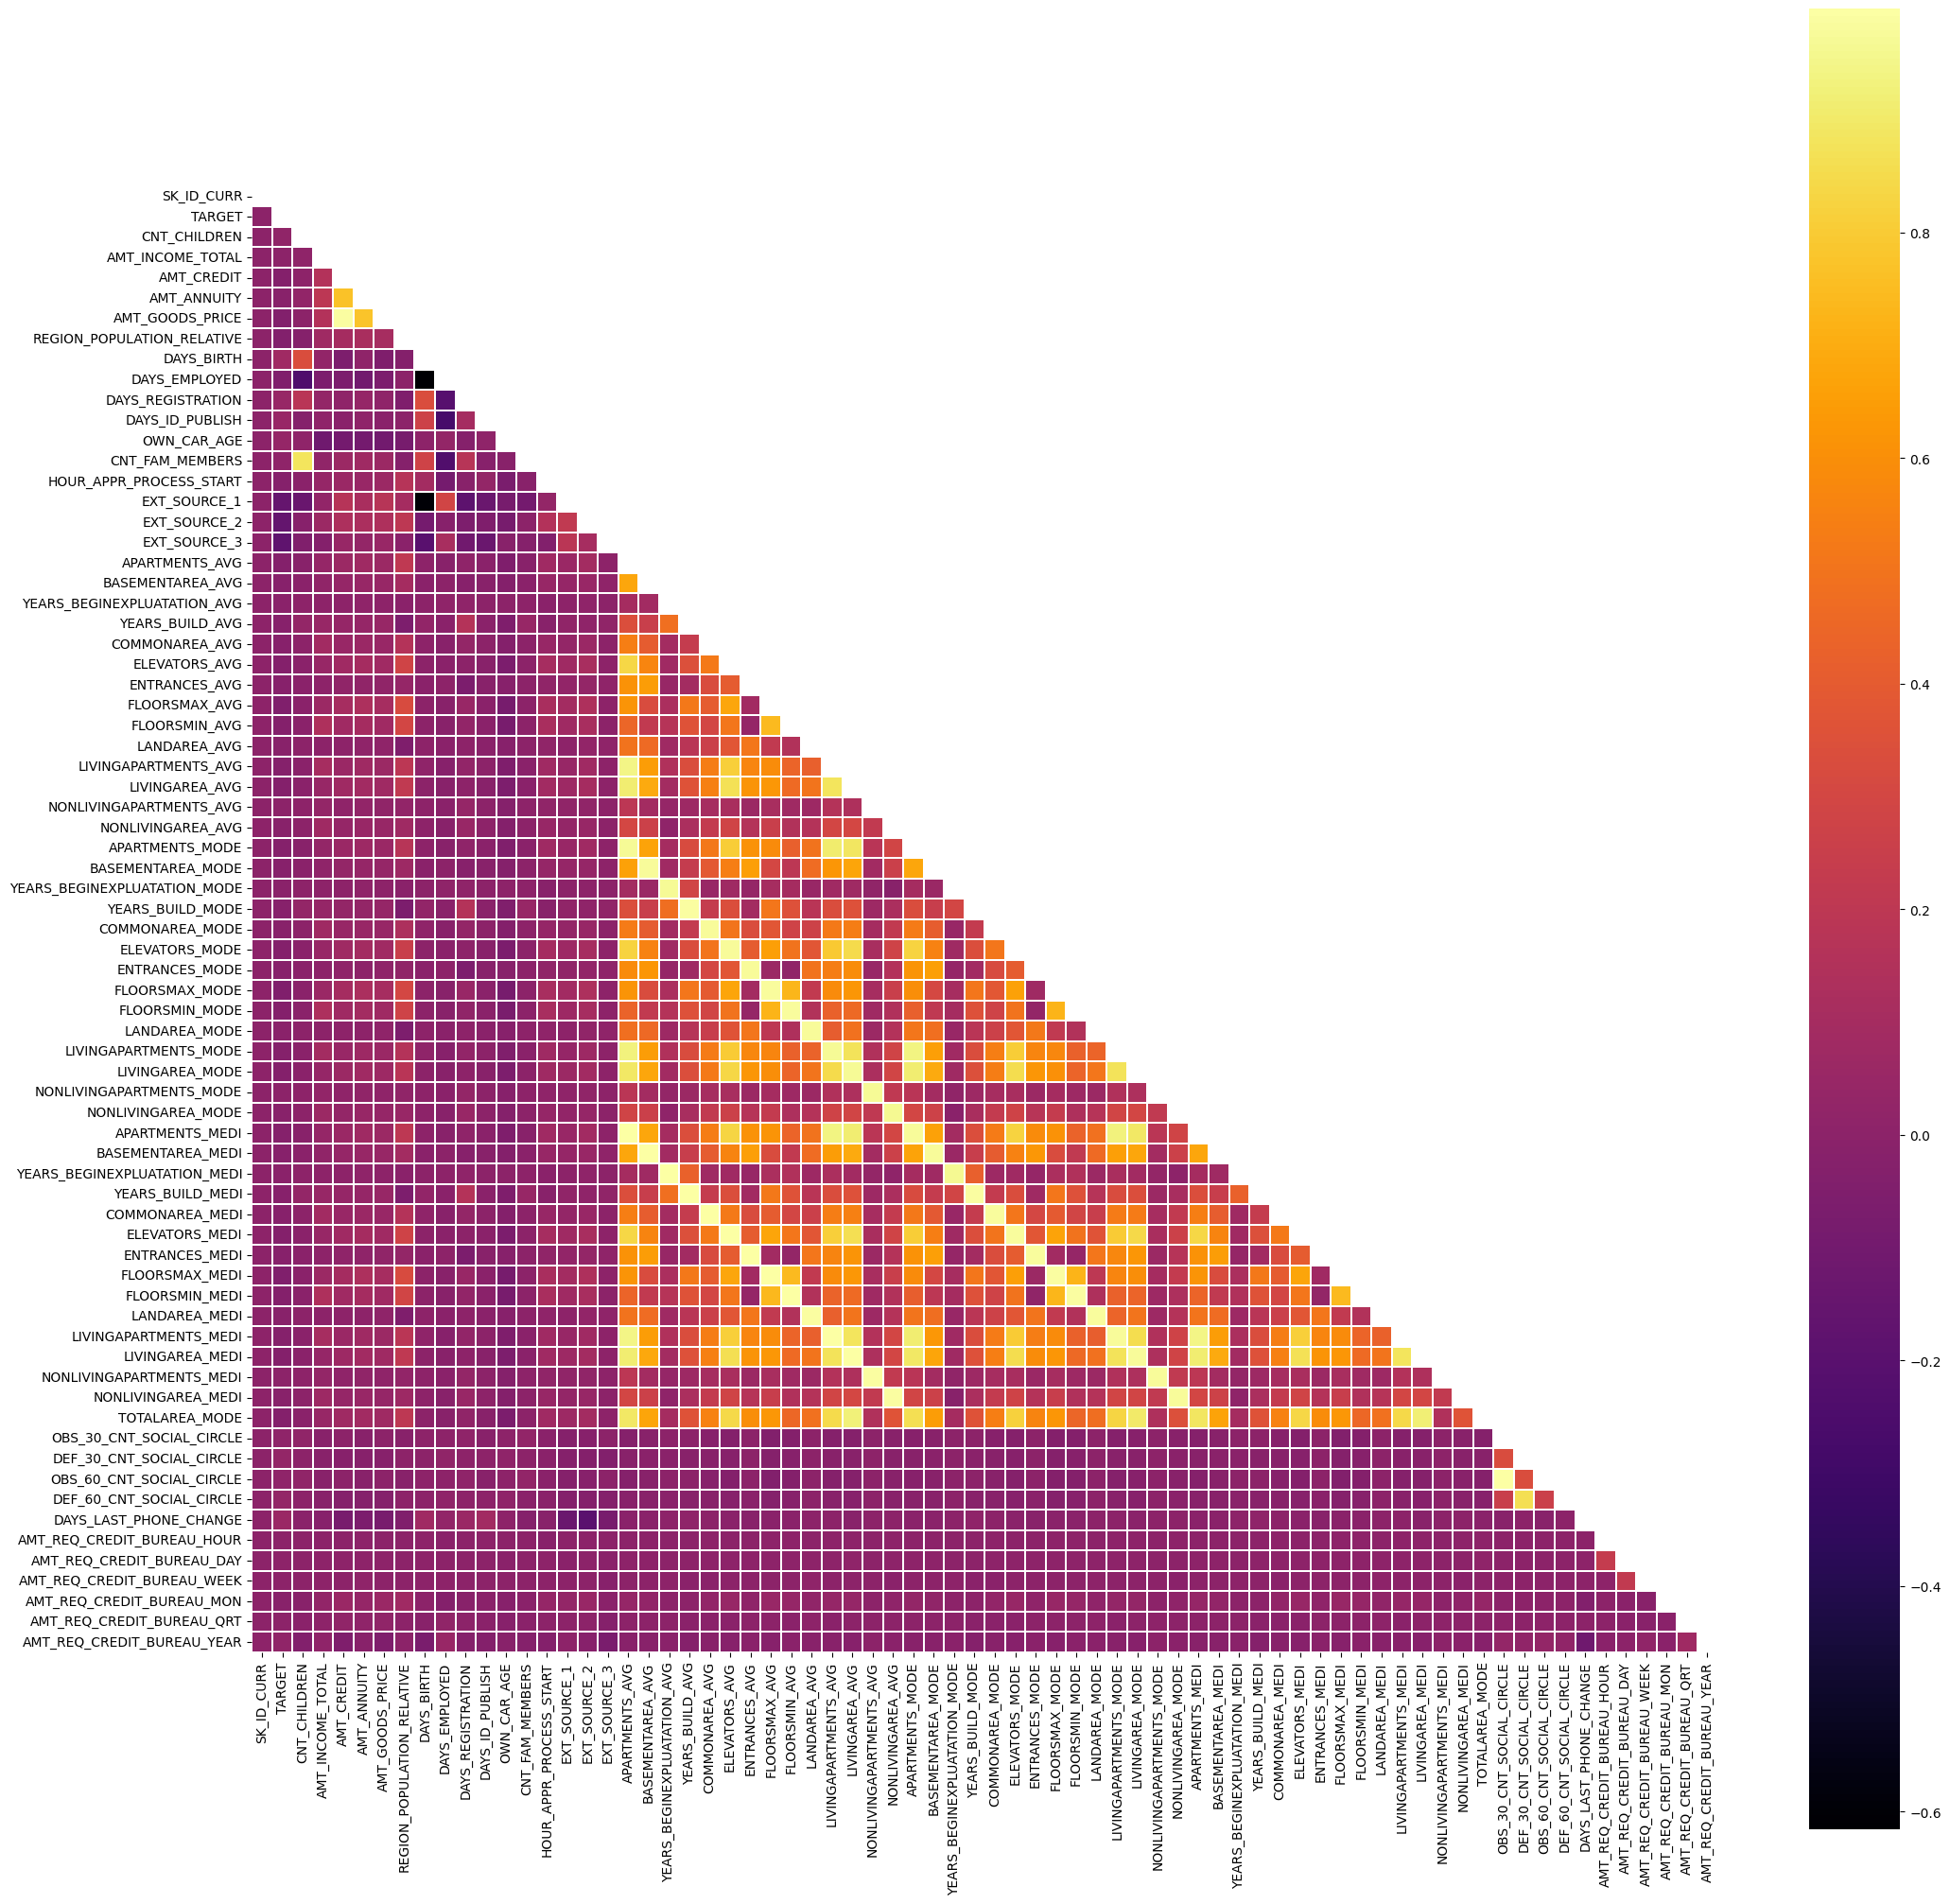

In [ ]:
corr_matrix = numeric_cols.corr()
target_corr = corr_matrix['TARGET'].sort_values(ascending=False)
plt.subplots(figsize=(25,25))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, cmap = 'inferno', square = True, annot=False,mask=mask,linewidth = 0.1)


In [ ]:
# Create a DataFrame containing the names and correlation coefficients of the first 10 and last 10 highly correlated columns
top_corr_cols = pd.concat([target_corr[:7], target_corr[-7:]])
top_corr_cols = top_corr_cols.reset_index()
top_corr_cols.columns = ['Feature', 'Correlation']
# Print the first 5 and last 5 highly correlated columns
print("First 10 and last 10 highly correlated columns with TARGET:\n")
print(top_corr_cols)


First 10 and last 10 highly correlated columns with TARGET:

                     Feature  Correlation
0                     TARGET     1.000000
1                 DAYS_BIRTH     0.078239
2     DAYS_LAST_PHONE_CHANGE     0.055219
3            DAYS_ID_PUBLISH     0.051457
4          DAYS_REGISTRATION     0.041975
5                OWN_CAR_AGE     0.037612
6   DEF_30_CNT_SOCIAL_CIRCLE     0.032248
7             FLOORSMAX_MODE    -0.043228
8             FLOORSMAX_MEDI    -0.043769
9              FLOORSMAX_AVG    -0.044005
10             DAYS_EMPLOYED    -0.044932
11              EXT_SOURCE_1    -0.155318
12              EXT_SOURCE_2    -0.160471
13              EXT_SOURCE_3    -0.178918


The heatmap does a good job of showing the value or level of correlation that each particular feature has with all other features.

- Most of the features in the dataset are not strongly correlated with each other, as indicated by the purple-ish color on the heatmap.
- However, there are some features in the middle of the heatmap that are highly correlated, particularly those related to the statistics of apartments.
- Correlated features can increase the time complexity of a model without adding much value, so it is important to remove inter-correlated features.
If we look at the features of application_train, we can clearly see that the statistics of apartments are given in terms of Mean, Median and Mode, so it can be expected for the mean, median and mode to be correlated with each other. One more thing to note is that the features among particular category, for example Mean are also correlated with other mean features, such as Number of Elevators, Living Area, Non-Living Area, Basement Area, etc.We also see some high correlation between AMT_GOODS_PRICE and AMT_CREDIT, between DAYS_EMPLOYED and DAYS_BIRTH.

- There are some features, such as the EXT_SOURCE features, that are highly correlated with the target variable and may be important for a classification task.




The above numeric column features are highly correlated with the target variable. Now, lets see the distribution of data in these columns.

##### **Distribution of 'DAYS_BIRTH'**


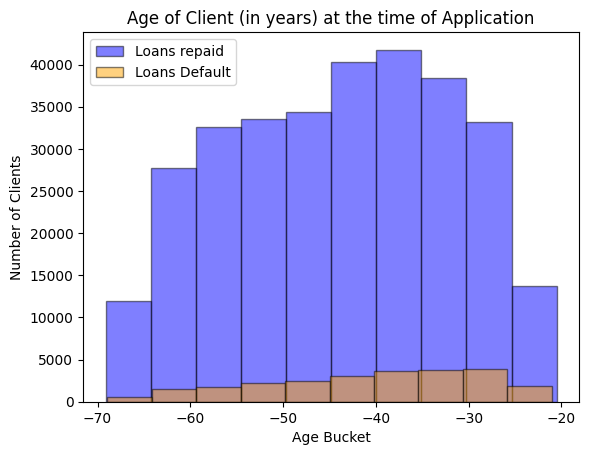

In [ ]:
# plot histogram for all clients
plt.hist(raw_df['DAYS_BIRTH'].values/365, bins=10, edgecolor='black', color='blue', alpha=0.5)

# plot histogram for clients deemed not capable
loan_default_days_birth = raw_df[raw_df['TARGET']==1]['DAYS_BIRTH'].values/365
plt.hist(loan_default_days_birth, bins=10, edgecolor='black', color='orange', alpha=0.5)

plt.title('Age of Client (in years) at the time of Application')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.legend(['Loans repaid', 'Loans Default'])
plt.show()

- Most number of people applying for loans are in the range of (35-40) years whereas this is followed by people in the range of (40-45) years whereas the number of applicants in people aged <25 or aged>65 is very low.
- People aged in the buckets (25-30) years and (30-35) years have a large chance of being deemed not capable for loan repayment.

In [ ]:
#Lets define a function to generate a box plot and kde plots showing the distribution of the numerical feature with TARGET VARIABLE
def plot_numerical_bylabel(data, col, size=[18, 4]):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=size)
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = data['TARGET'].corr(data[col])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = data.loc[data['TARGET'] == 0, col].median()
    avg_not_repaid = data.loc[data['TARGET'] == 1, col].median()
    
    # Plot the box plot in the first subplot
    sns.boxplot(x='TARGET', y=col, data=data, ax=ax1)
    ax1.set_xlabel('TARGET'); ax1.set_ylabel(col); ax1.set_title('%s Distribution' % col)
    
    # Plot the density plot in the second subplot
    #sns.kdeplot(data.loc[data['TARGET'] == 0, col], label = 'TARGET == 0', ax=ax2)
    #sns.kdeplot(data.loc[data['TARGET'] == 1, col], label = 'TARGET == 1', ax=ax2)
    sns.distplot(raw_df[raw_df['TARGET']==0][col].values,hist=False,label='TARGET == 0', ax=ax2)
    sns.distplot(raw_df[raw_df['TARGET']==1][col].values,hist=False,label='TARGET == 1',ax=ax2)
    ax2.set_xlabel(col); ax2.set_ylabel('Density'); ax2.set_title('%s Distribution' % col)
    ax2.legend();


##### **Distribution of 'DAYS_BIRTH' and 'DAYS_EMPLOYED**


In [ ]:
raw_df['DAYS_BIRTH'] = abs(raw_df['DAYS_BIRTH'])

In [ ]:
raw_df['YEARS_BIRTH'] = [i/365 for i in raw_df['DAYS_BIRTH']]
raw_df['YEARS_EMPLOYED'] = [i/365 for i in raw_df['DAYS_EMPLOYED']]

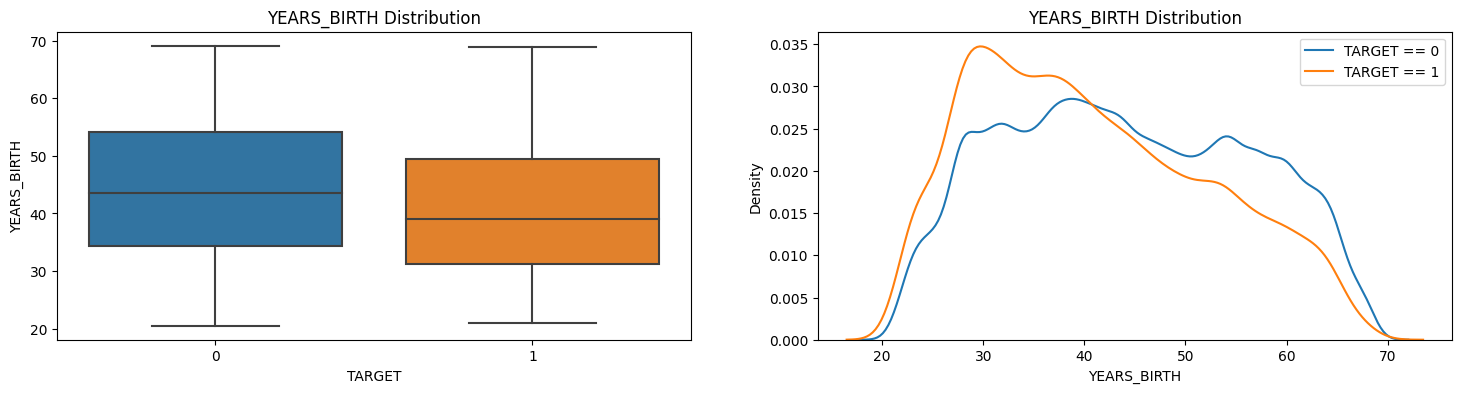

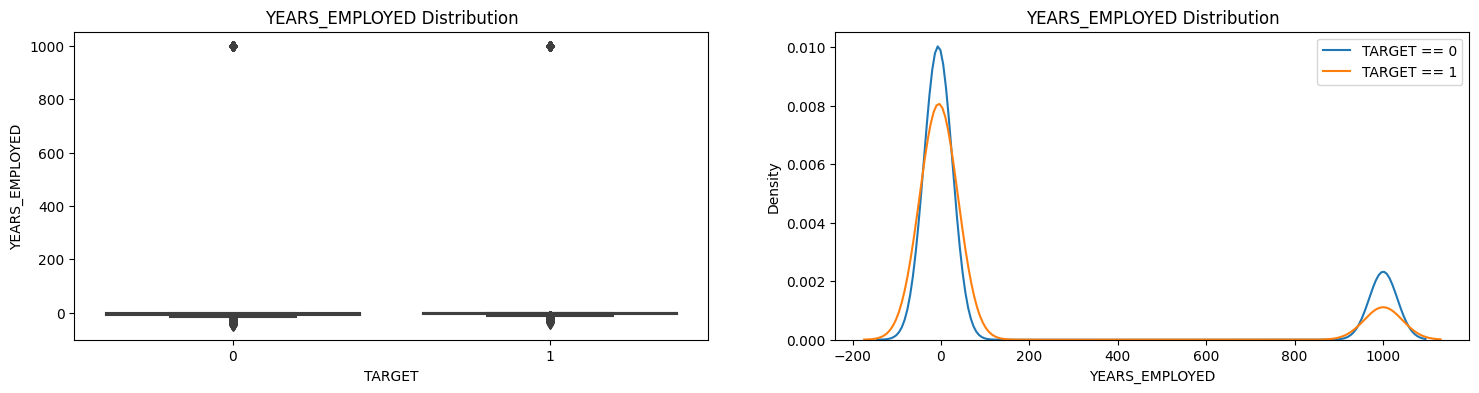

In [ ]:
plot_numerical_bylabel(raw_df, 'YEARS_BIRTH')
plot_numerical_bylabel(raw_df, 'YEARS_EMPLOYED')

In [ ]:
raw_df.drop(['YEARS_BIRTH', 'YEARS_EMPLOYED'], axis=1, inplace=True)

**Observations** 
- From the distplot, we can observe the peak of Age of people who Default to be close to 30 years.
- From the box-plot too, we can visualize that the Age of Defaulters is usually lesser than the Non-Defaulters.These observations imply that the Defaulters are usually younger than Non-Defaulters.
- we can see from the histogram that there are some clients that have worked for 1000 years which is impossible and its an outlier and have to figure out a way to deal with it.

##### **Distribution of AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'**


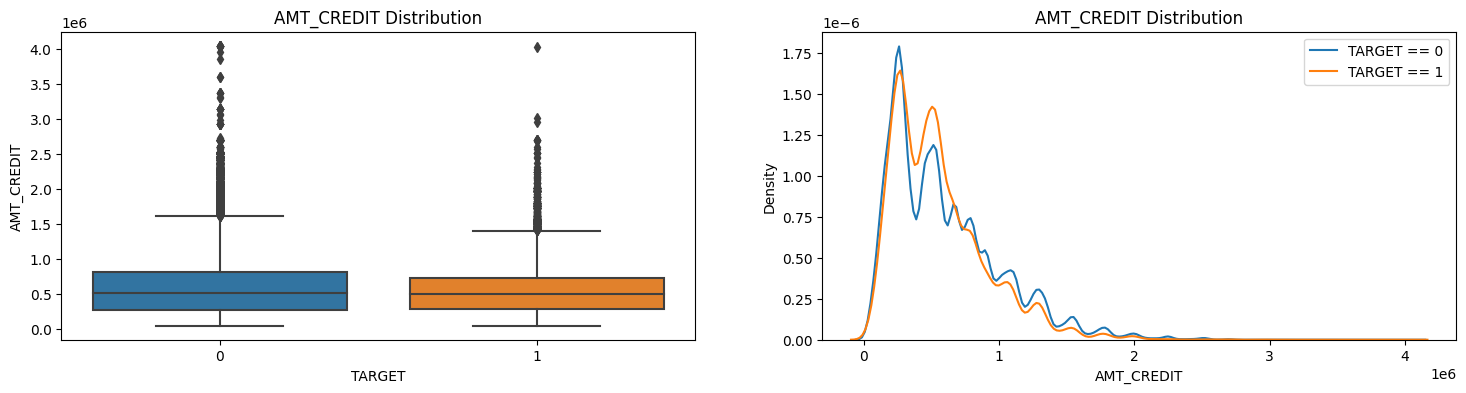

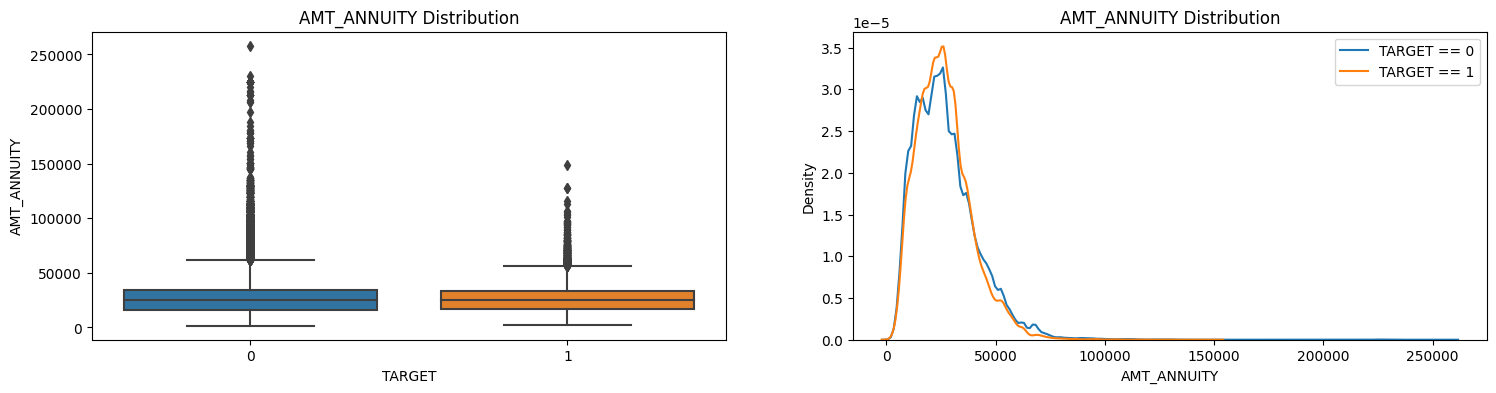

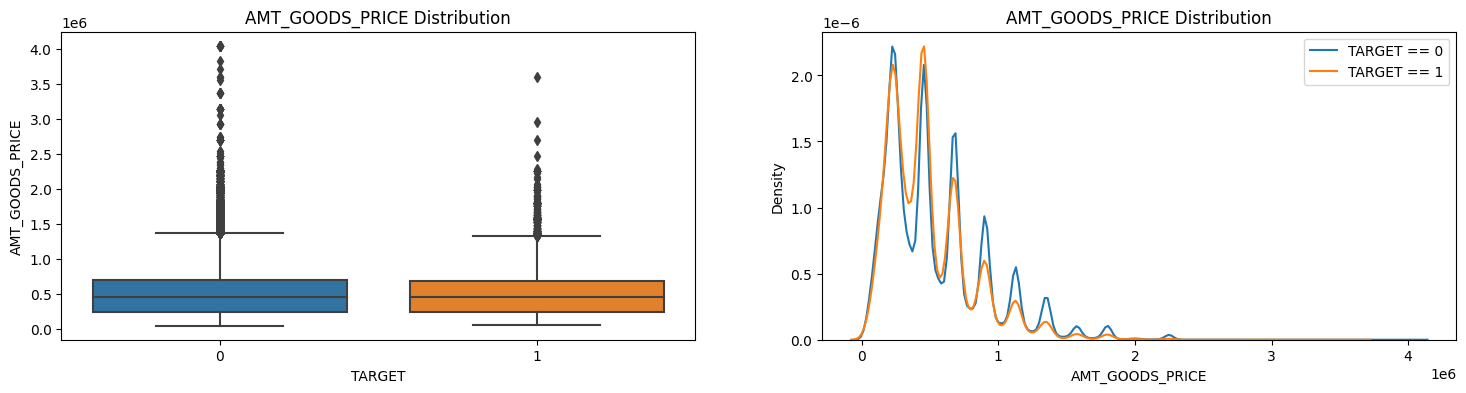

In [ ]:
plot_numerical_bylabel(raw_df, 'AMT_CREDIT')
plot_numerical_bylabel(raw_df, 'AMT_ANNUITY')
plot_numerical_bylabel(raw_df, 'AMT_GOODS_PRICE')

- We can see from the Boxplot above that the Median Value of the Credit Amount of the Customers who are capable of loan repayment is slightly larger than the Median Value of Customers who are not capable of repayment.
- This basically means that the customers with higher credit amount have a slightly higher chances of being capable of loan repayment than customers with lower credit amount.
- Most people pay annuity below Rs. 50K for the loans.
- Most number of loans are given for goods that are priced below Rs. 10 lakhs.



##### **Distribution of 'DAYS_ID_PUBLISH' and 'DAYS_REGISTRATION**


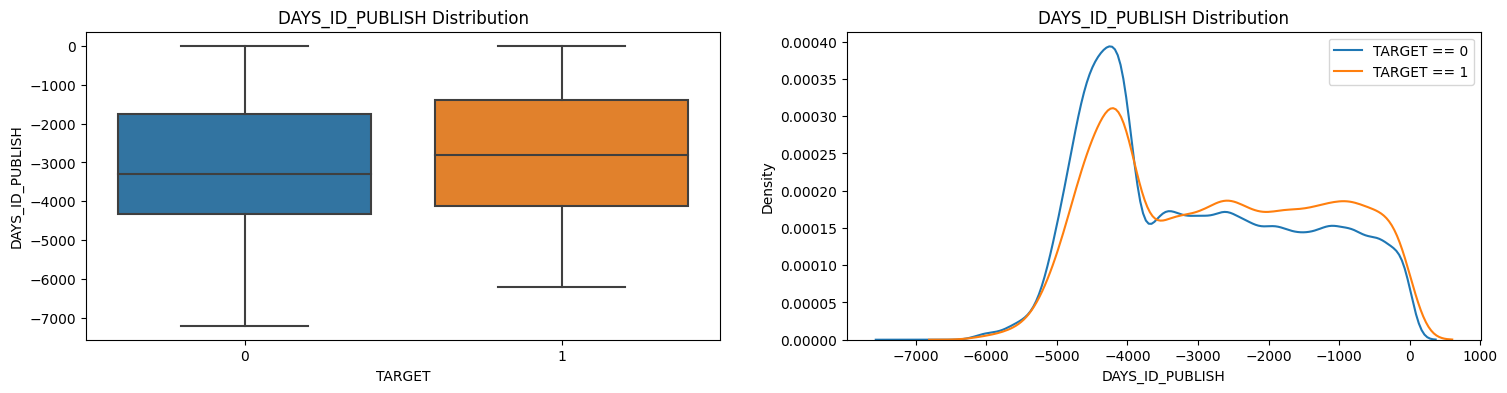

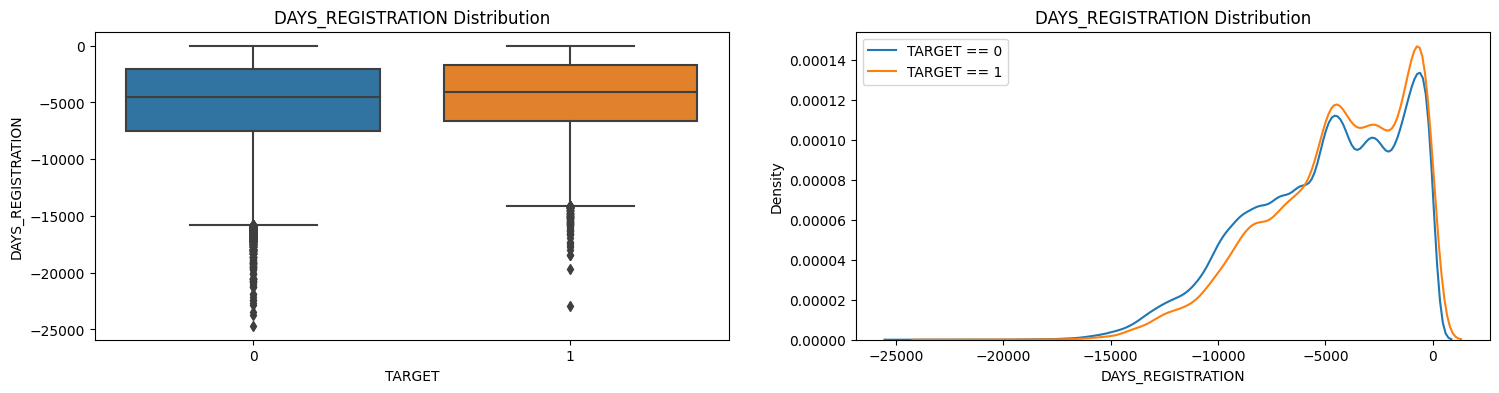

In [ ]:
plot_numerical_bylabel(raw_df, 'DAYS_ID_PUBLISH');
plot_numerical_bylabel(raw_df, 'DAYS_REGISTRATION');

- Most of the clients have changed their identity document around 4000 days (10.95 years) before the application date.
- Most of the clients have changed their registration less than 15000 days (41 years) before the loan application, whereas in most cases it is less than 5000 days (13 years).
- From both the boxplots we can see that Defaulters usually had lesser number of days since they changed their identity and the registration.

##### **Distribution of 'OWN_CAR_AGE'**


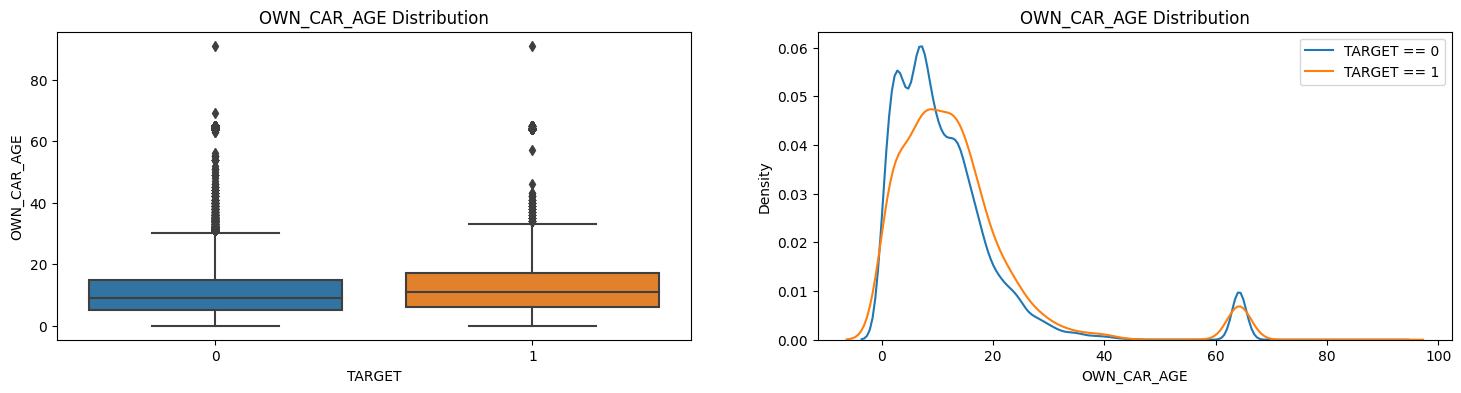

In [ ]:
plot_numerical_bylabel(raw_df, 'OWN_CAR_AGE');

- Most of the clients have their cars less than 20 years old whereas there are very few cars that are older than 20 years.

##### **Distribution of 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI' AND 'FLOORSMAX_AVG'**


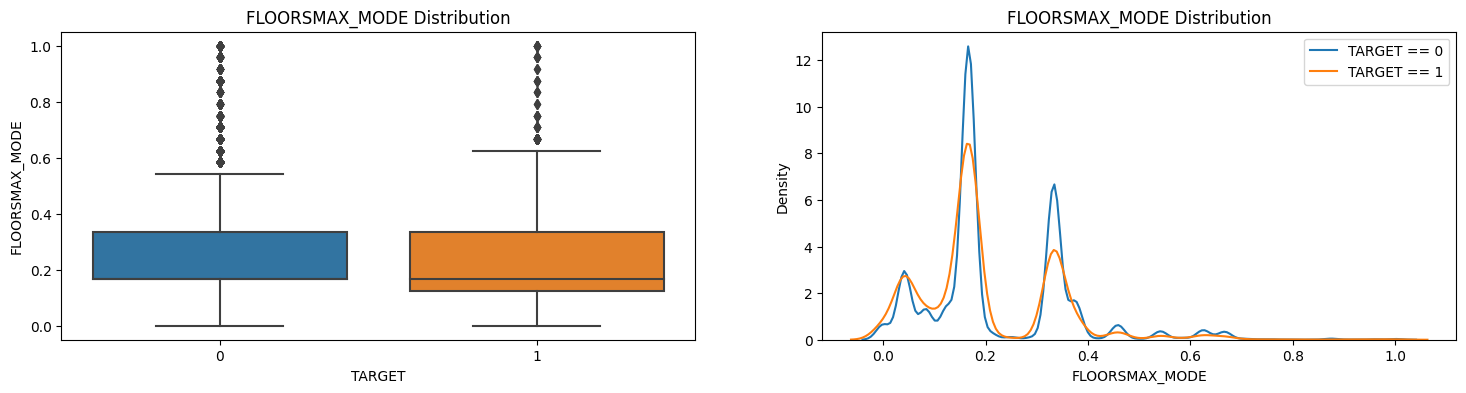

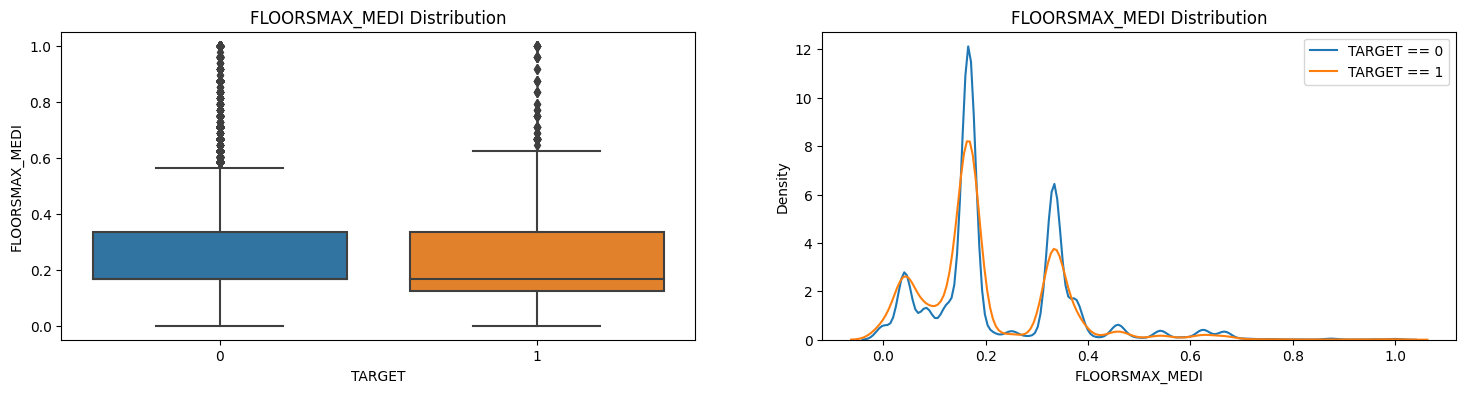

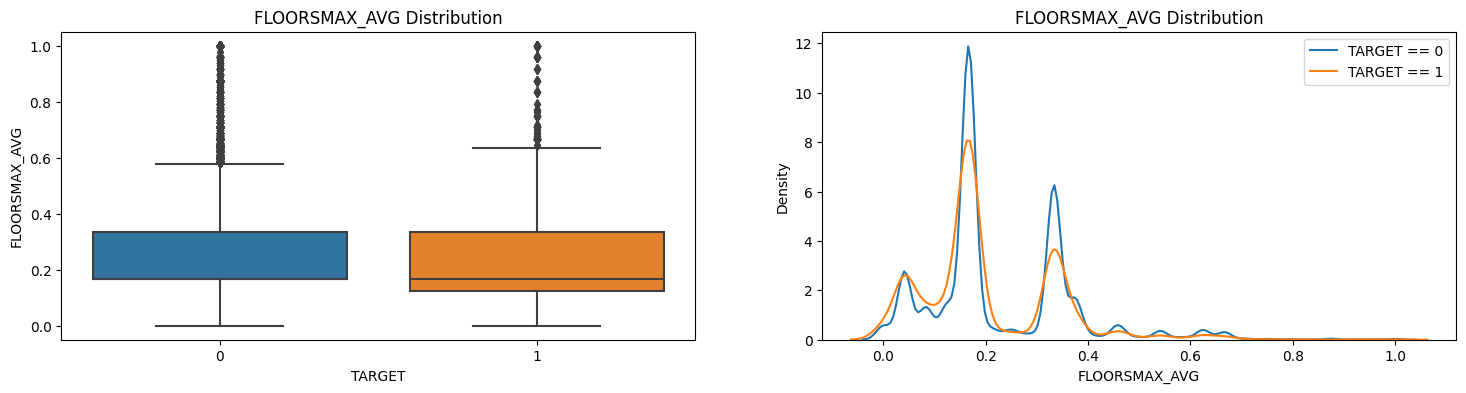

In [ ]:
plot_numerical_bylabel(raw_df, 'FLOORSMAX_MODE');
plot_numerical_bylabel(raw_df, 'FLOORSMAX_MEDI');
plot_numerical_bylabel(raw_df, 'FLOORSMAX_AVG');

- All the 3 features of FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE have similar distribution and the Non-Defaulters tend to show a higher value of  as compared to Defaulters. hence can be an important feature.

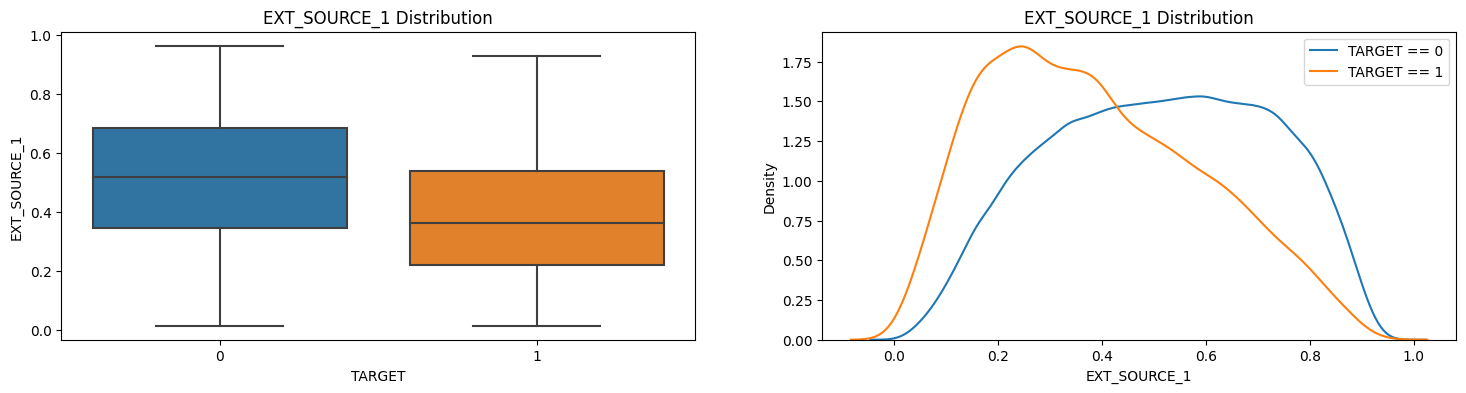

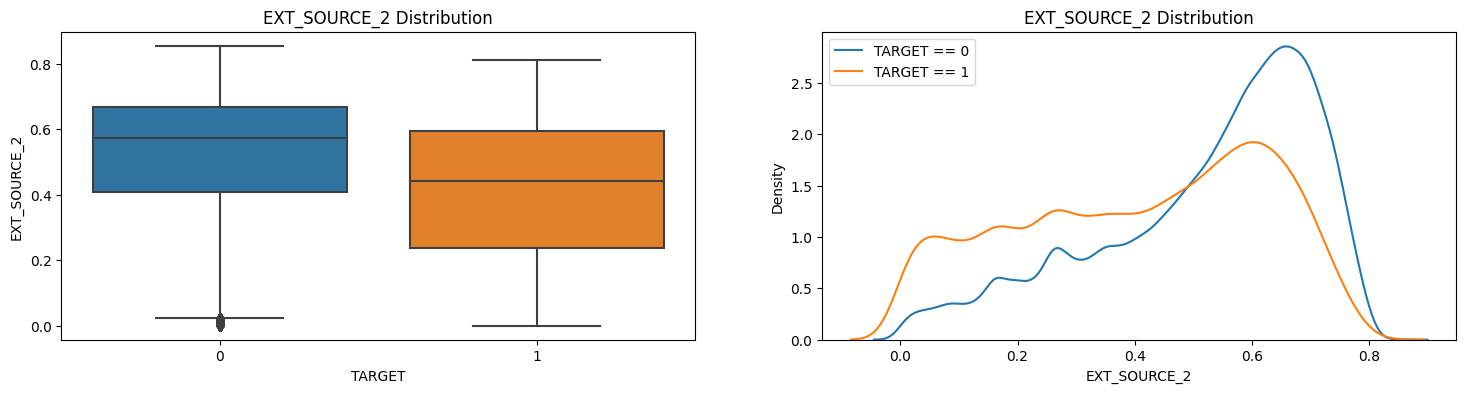

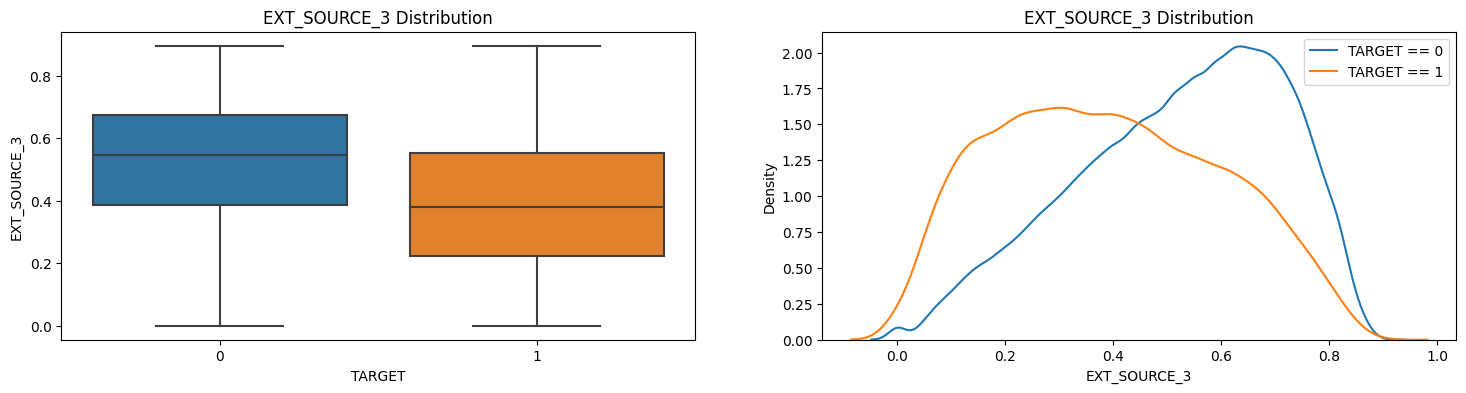

In [ ]:
plot_numerical_bylabel(raw_df, 'EXT_SOURCE_1');
plot_numerical_bylabel(raw_df, 'EXT_SOURCE_2');
plot_numerical_bylabel(raw_df, 'EXT_SOURCE_3');

- If we look at the box-plots, we can clearly see a similar trend for all three EXT_SOURCE columns, which is that the Defaulters tend to have considerably lower values.
- This trend can also be seen with the PDFs. The Non-Defaulters show a higher peak at high EXT_SOURCE values, and the Probability Densities are very low for low values. This implies that Non-Defaulters generally have high values of these scores. EXT_SOURCE_1 and EXT_SOURCE_3 columns tend to show better discrimination/separability as compared to EXT_SOURCE_2.
- These 3 features look to be best separating the Defaulters and Non-Defaulters linearly among all the features so far. This is the first feature that we are seeing where there is some considerable difference among the 2 classes, as we can see from the PDF plot.
- The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE,DAYS_BIRTH features with the target and with each othersince they are highly correlated with each other

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = raw_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155318,-0.160471,-0.178918,-0.078239
EXT_SOURCE_1,-0.155318,1.000000,0.213984,0.186842,0.600611
EXT_SOURCE_2,-0.160471,0.213984,1.000000,0.109166,0.091996
EXT_SOURCE_3,-0.178918,0.186842,0.109166,1.000000,0.205477
DAYS_BIRTH,-0.078239,0.600611,0.091996,0.205477,1.000000


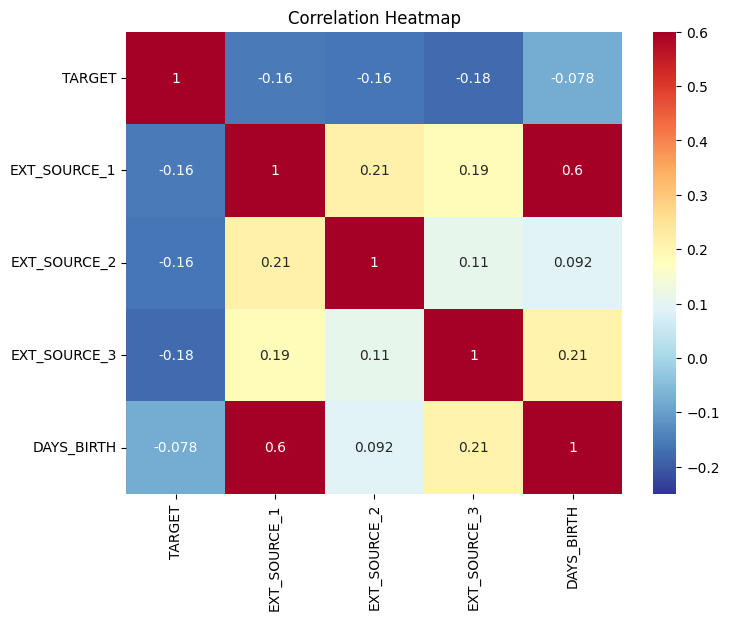

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

### **Preprocessing the data**

### **Train,Test,Split**

Splitting a dataset into training, validation, and test sets is an essential step in machine learning. The purpose of splitting the data is to use one part of the data for training the model, another part for validating the model, and a third part for testing the model.


The **training set** is used to fit the model to the data. The model learns the relationship between the input features and the output variable (target) based on the data in the training set. 

The **validation set** is used to tune the hyperparameters of the model and to evaluate its performance during training. The hyperparameters are settings of the model that are not learned from the data but are set by the user before training. By tuning the hyperparameters on the validation set, we can improve the performance of the model and prevent overfitting. Overfitting occurs when the model is too complex and fits the training set too closely, resulting in poor performance on new data.

The **test set** is used to evaluate the performance of the final model after it has been trained and tuned on the training and validation sets. The test set is a completely new and independent dataset that the model has not seen before. By evaluating the model on the test set, we can get an estimate of how well the model will perform on new, unseen data.

Typically, the dataset is randomly split into three parts: 60-80% for training, 10-20% for validation, and 10-20% for testing.  

The most common split is 80% for training and 20% for validation, but this can vary depending on the size and complexity of the dataset.

The exact percentages may vary depending on the size and complexity of the dataset.

It is important to ensure that the data is split in a way that is representative of the real-world problem that the model is trying to solve.

In [ ]:
from sklearn.model_selection import train_test_split

# Assume your raw dataframe is stored in a variable called "df"
# Split the dataframe into features and target variable
input_cols = raw_df.drop('TARGET', axis=1)
output_cols = raw_df['TARGET']

In [ ]:
# Split the data into training and validation sets
# Set the "test_size" parameter to the proportion of data you want to allocate to the validation set
# Set the "random_state" parameter to ensure reproducibility
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_cols, output_cols, test_size=0.2, random_state=42)

In [ ]:
print(categorical_columns)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUM

In [ ]:
numerical_columns = list(numeric_cols.columns)
numerical_columns.remove('TARGET')
print(numerical_columns)

['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVA

### **Application_test.csv**

In [ ]:
test_df = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_test.csv'))
test_df.shape
test_inputs = test_df

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


### **Imputation: Missing value imputation**
It is the process of filling in missing values in a dataset with estimated values based on the available data. This is a crucial step in data preprocessing before building machine learning models as missing data can impact the performance of the model.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numerical_columns])
train_inputs[numerical_columns] = imputer.transform(train_inputs[numerical_columns])
val_inputs[numerical_columns] = imputer.transform(val_inputs[numerical_columns])
test_inputs[numerical_columns] = imputer.transform(test_inputs[numerical_columns])

### **Scaling: Feature scaling**
It is the process of transforming data so that it falls within a specific range. This is important because some machine learning algorithms are sensitive to the scale of the input features. By scaling the features to a common range, we can prevent the algorithm from giving undue importance to certain features just because they have larger values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numerical_columns])
train_inputs[numerical_columns] = scaler.transform(train_inputs[numerical_columns])
val_inputs[numerical_columns] = scaler.transform(val_inputs[numerical_columns])
test_inputs[numerical_columns] = scaler.transform(test_inputs[numerical_columns])

### **One Hot Encoder: Categorical feature encoding**
It is the process of converting categorical variables (which can take a limited number of discrete values) into numerical values that can be used for machine learning models. One Hot Encoding is a common method used for this task where each category is represented as a binary vector of 1's and 0's where only one element is 1 and the rest are 0's.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_columns])
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_columns])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_columns])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_columns])

The numerical columns are the continuous variables that have been scaled and/or imputed as part of the data preprocessing steps. The encoded columns are the categorical variables that have been one-hot encoded to convert them into a numerical representation.

By concatenating these columns together, the resulting datasets contain all the necessary features for the machine learning models to train, validate, and test.

In [ ]:
X_train = train_inputs[numerical_columns + encoded_cols]
X_val = val_inputs[numerical_columns + encoded_cols]
X_test = test_inputs[numerical_columns + encoded_cols]

## **Testing Different Machine Learning Models to Find the Ultimate Winner**

### **Logistic Regression Model -  Baseline**

For a naive baseline, we could guess the same value for all examples on the testing set. We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5 in the competition (random guessing on a classification task will score a 0.5).

Since we already know what score we are going to get, we don't really need to make a naive baseline guess. Let's use a slightly more sophisticated model for our actual baseline: Logistic Regression.

We will use LogisticRegressionfrom Scikit-Learn for our first model. The only change we will make from the default model settings is to lower the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default LogisticRegression, but it still will set a low bar for any future models.

Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using .fit and then we make predictions on the testing data using .predict_proba (remember that we want probabilities and not a 0 or 1).

In [ ]:
X_train.shape,X_test.shape

((246008, 287), (48744, 287))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_train,train_targets)

LogisticRegression(C=0.0001)

Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

The following code makes the predictions and selects the correct column.

In [ ]:
# Predict on validation inputs
val_preds = log_reg.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
from sklearn.metrics import roc_auc_score
val_roc_auc = roc_auc_score(val_targets, val_preds)
print('Validation ROC AUC score:', val_roc_auc)

Validation ROC AUC score: 0.683354342739555


In [ ]:
app_test = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_test.csv'))

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


In [ ]:
# Make predictions on the test set
test_preds = log_reg.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_baseline.csv', index=False)

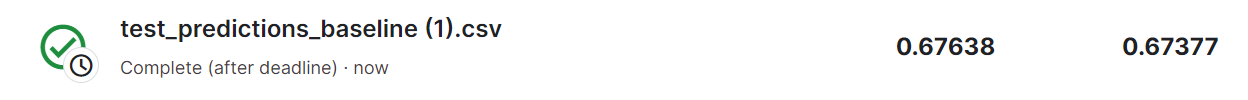

I've trained a logistic regression model got a score of 0.673 on the kaggle leaderboard. But I want to improve the accuracy of the model by trying out different classifiers and finding the best one. Once I find the best performing model, I'll focus on tuning and improving it to get even better results. This will help me get the most out of my data and find the best machine learning solution for my problem.

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Make the model with the specified hyperparameters
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train on the training data
dt.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Predict on validation inputs
val_preds = dt.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)
print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7088187513486307


In [ ]:
# Make predictions on the test set
test_preds = dt.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_dt.csv', index=False)

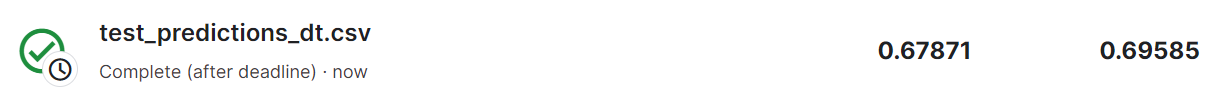

### **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the model with the specified hyperparameters
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on the training data
rf.fit(X_train, train_targets)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on validation inputs
val_preds = rf.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)
print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7080872778708781


In [ ]:
# Make predictions on the test set
test_preds = rf.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_rf.csv', index=False)

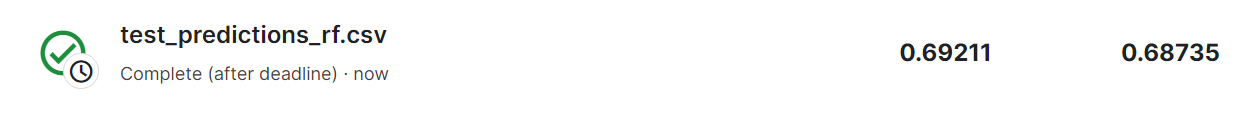

### **XG Boost**

In [ ]:
from xgboost import XGBClassifier

# Make the model with the specified hyperparameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train on the training data
xgb.fit(X_train, train_targets)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
# Predict on validation inputs
val_preds = xgb.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)
print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7573958339414684


In [ ]:
# Make predictions on the test set
test_preds = xgb.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_xgb.csv', index=False)

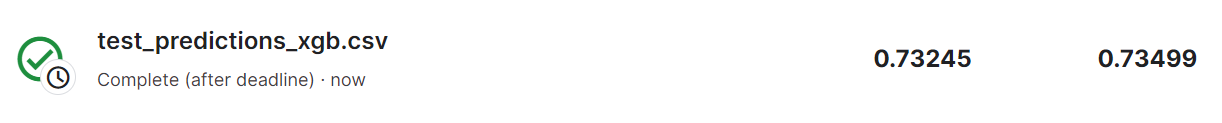

### **LGBM Classifier**

In [ ]:
import re
# Replace all special characters with underscores
X_train.columns = [re.sub('[^0-9a-zA-Z]+', '_', col) for col in X_train.columns]
X_val.columns = [re.sub('[^0-9a-zA-Z]+', '_', col) for col in X_val.columns]
X_test.columns = [re.sub('[^0-9a-zA-Z]+', '_', col) for col in X_test.columns]

In [ ]:
import lightgbm as lgb

# Train the model on the training set
lgbm = lgb.LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.1, random_state=42)

# Train on the training data
lgbm.fit(X_train, train_targets)

LGBMClassifier(max_depth=7, random_state=42)

In [ ]:
# Predict on validation inputs
val_preds = lgbm.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)
print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7576993006281929


In [ ]:
# Make predictions on the test set
test_preds = lgbm.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_lgbm.csv', index=False)

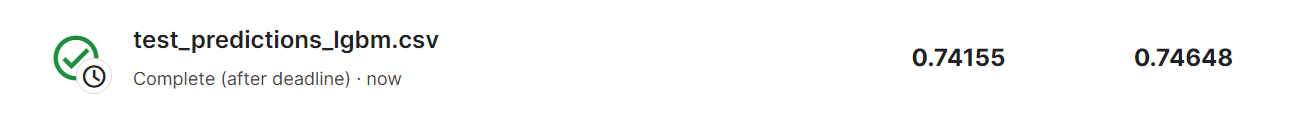

I tried out different classifier models and found that the LGBM classifier performed the best on the leaderboard. But I want to make sure that the model is as accurate as possible, so I'm going to use techniques like hyperparameter tuning, cross-validation, and feature engineering. 

**Hyperparameter tuning** is all about adjusting the parameters of the model to make it work better. 

**Cross-validation** helps me see how the model performs on different parts of the data.

**Feature engineering** involves creating new features or choosing the most important ones to make the model even more accurate. 

Let's try these techniques and find if this helps me fine-tuning the LGBM model and hopefully get even better results on my problem.

## **Hyperparameter Tuning**
Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning model. Hyperparameters are parameters that cannot be learned from the data during training, and must be set by the user before training the model. These parameters can have a large impact on the performance of the model, so it is important to choose the right values for them.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 1.0]
}

lgbm = lgb.LGBMClassifier(random_state=38)

grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5)

# Train on the training data
grid_search.fit(X_train, train_targets)

In [ ]:
# Predict on validation inputs
val_preds = grid_search.predict_proba(X_val)[:, 1]

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)

print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7570373555214919


In [ ]:
# Make predictions on the test set
test_preds = grid_search.predict_proba(X_test)[:,1]

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_lgbm_fe.csv', index=False)

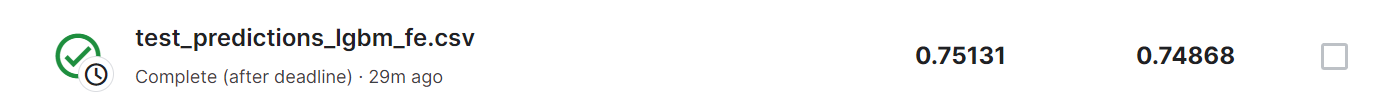

## **Hyperparameter tuning and Cross Validation**

Hyperparameter tuning involves finding the optimal values of the model's hyperparameters that maximize the model's performance on the given dataset. Cross-validation is a technique used to evaluate the performance of a model by splitting the data into training and validation sets multiple times and calculating the average performance across all splits.

Hyperparameter tuning with cross-validation involves performing a grid search over a range of hyperparameter values and using k-fold cross-validation to evaluate the performance of the model for each combination of hyperparameter values. The combination of hyperparameter values that results in the highest cross-validation score is selected as the optimal hyperparameters for the model. This helps to ensure that the model's performance is not overfitting to the training data and is generalizable to new data.

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold

# Define the LightGBM dataset
train_data = lgb.Dataset(X_train, train_targets)

# Set the hyperparameters to tune and their ranges
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the LightGBM model
model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1, verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, train_targets)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the LightGBM model using the best hyperparameters and the full training dataset
best_params = grid_search.best_params_
model = lgb.LGBMClassifier(
    objective='binary', random_state=42, **best_params
)
model.fit(X_train, train_targets)


[20]	cv_agg's binary_logloss: 0.25241 + 0.00224883
[40]	cv_agg's binary_logloss: 0.248913 + 0.00223326
[60]	cv_agg's binary_logloss: 0.247819 + 0.00219199
[80]	cv_agg's binary_logloss: 0.247449 + 0.00224852
[100]	cv_agg's binary_logloss: 0.247308 + 0.00224233
[120]	cv_agg's binary_logloss: 0.247327 + 0.00229752
[140]	cv_agg's binary_logloss: 0.247383 + 0.00227542


In [ ]:
# Make predictions on the validation data
val_preds = model.predict(X_val)

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)

print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7584772323489457


In [ ]:
# Make predictions on the test set
test_preds = model.predict(X_test)

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_all287.csv', index=False)

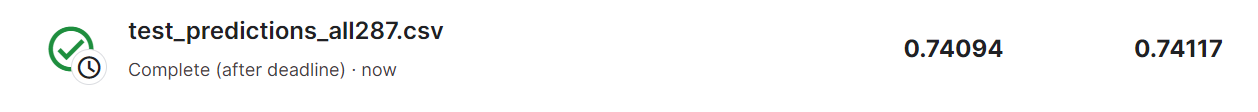

## **Feature Engineering**

In [ ]:
X_train['APPS_EXT_SOURCE_MEAN'] = X_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
X_train['APPS_EXT_SOURCE_STD'] = X_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
X_train['APPS_EXT_SOURCE_STD'] = X_train['APPS_EXT_SOURCE_STD'].fillna(X_train['APPS_EXT_SOURCE_STD'].mean())

X_val['APPS_EXT_SOURCE_MEAN'] = X_val[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
X_val['APPS_EXT_SOURCE_STD'] = X_val[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
X_val['APPS_EXT_SOURCE_STD'] = X_val['APPS_EXT_SOURCE_STD'].fillna(X_val['APPS_EXT_SOURCE_STD'].mean())

X_test['APPS_EXT_SOURCE_MEAN'] = X_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
X_test['APPS_EXT_SOURCE_STD'] = X_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
X_test['APPS_EXT_SOURCE_STD'] = X_test['APPS_EXT_SOURCE_STD'].fillna(X_test['APPS_EXT_SOURCE_STD'].mean())

'APPS_EXT_SOURCE_STD' and 'APPS_EXT_SOURCE_MEAN' are created for the datasets X_train, X_val, and X_test by taking the mean and standard deviation of the columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', and 'EXT_SOURCE_3'.

In [ ]:
X_train['APPS_ANNUITY_CREDIT_RATIO'] = X_train['AMT_ANNUITY']/X_train['AMT_CREDIT']
X_train['APPS_GOODS_CREDIT_RATIO'] = X_train['AMT_GOODS_PRICE']/X_train['AMT_CREDIT']

X_val['APPS_ANNUITY_CREDIT_RATIO'] = X_val['AMT_ANNUITY']/X_val['AMT_CREDIT']
X_val['APPS_GOODS_CREDIT_RATIO'] = X_val['AMT_GOODS_PRICE']/X_val['AMT_CREDIT']

X_test['APPS_ANNUITY_CREDIT_RATIO'] = X_test['AMT_ANNUITY']/X_test['AMT_CREDIT']
X_test['APPS_GOODS_CREDIT_RATIO'] = X_test['AMT_GOODS_PRICE']/X_test['AMT_CREDIT']

In [ ]:
X_train['APPS_ANNUITY_INCOME_RATIO'] = X_train['AMT_ANNUITY']/X_train['AMT_INCOME_TOTAL']
X_train['APPS_CREDIT_INCOME_RATIO'] = X_train['AMT_CREDIT']/X_train['AMT_INCOME_TOTAL']
X_train['APPS_GOODS_INCOME_RATIO'] = X_train['AMT_GOODS_PRICE']/X_train['AMT_INCOME_TOTAL']
X_train['APPS_CNT_FAM_INCOME_RATIO'] = X_train['AMT_INCOME_TOTAL']/X_train['CNT_FAM_MEMBERS']

X_val['APPS_ANNUITY_INCOME_RATIO'] = X_val['AMT_ANNUITY']/X_val['AMT_INCOME_TOTAL']
X_val['APPS_CREDIT_INCOME_RATIO'] = X_val['AMT_CREDIT']/X_val['AMT_INCOME_TOTAL']
X_val['APPS_GOODS_INCOME_RATIO'] = X_val['AMT_GOODS_PRICE']/X_val['AMT_INCOME_TOTAL']
X_val['APPS_CNT_FAM_INCOME_RATIO'] = X_val['AMT_INCOME_TOTAL']/X_val['CNT_FAM_MEMBERS']

X_test['APPS_ANNUITY_INCOME_RATIO'] = X_test['AMT_ANNUITY']/X_test['AMT_INCOME_TOTAL']
X_test['APPS_CREDIT_INCOME_RATIO'] = X_test['AMT_CREDIT']/X_test['AMT_INCOME_TOTAL']
X_test['APPS_GOODS_INCOME_RATIO'] = X_test['AMT_GOODS_PRICE']/X_test['AMT_INCOME_TOTAL']
X_test['APPS_CNT_FAM_INCOME_RATIO'] = X_test['AMT_INCOME_TOTAL']/X_test['CNT_FAM_MEMBERS']

In [ ]:
X_train['APPS_EMPLOYED_BIRTH_RATIO'] = X_train['DAYS_EMPLOYED']/X_train['DAYS_BIRTH']
X_train['APPS_INCOME_EMPLOYED_RATIO'] = X_train['AMT_INCOME_TOTAL']/X_train['DAYS_EMPLOYED']
X_train['APPS_INCOME_BIRTH_RATIO'] = X_train['AMT_INCOME_TOTAL']/X_train['DAYS_BIRTH']
X_train['APPS_CAR_BIRTH_RATIO'] = X_train['OWN_CAR_AGE']/X_train['DAYS_BIRTH']
X_train['APPS_CAR_EMPLOYED_RATIO'] = X_train['OWN_CAR_AGE']/X_train['DAYS_EMPLOYED']

X_val['APPS_EMPLOYED_BIRTH_RATIO'] = X_val['DAYS_EMPLOYED']/X_val['DAYS_BIRTH']
X_val['APPS_INCOME_EMPLOYED_RATIO'] = X_val['AMT_INCOME_TOTAL']/X_val['DAYS_EMPLOYED']
X_val['APPS_INCOME_BIRTH_RATIO'] = X_val['AMT_INCOME_TOTAL']/X_val['DAYS_BIRTH']
X_val['APPS_CAR_BIRTH_RATIO'] = X_val['OWN_CAR_AGE']/X_val['DAYS_BIRTH']
X_val['APPS_CAR_EMPLOYED_RATIO'] = X_val['OWN_CAR_AGE']/X_val['DAYS_EMPLOYED']

X_test['APPS_EMPLOYED_BIRTH_RATIO'] = X_test['DAYS_EMPLOYED']/X_test['DAYS_BIRTH']
X_test['APPS_INCOME_EMPLOYED_RATIO'] = X_test['AMT_INCOME_TOTAL']/X_test['DAYS_EMPLOYED']
X_test['APPS_INCOME_BIRTH_RATIO'] = X_test['AMT_INCOME_TOTAL']/X_test['DAYS_BIRTH']
X_test['APPS_CAR_BIRTH_RATIO'] = X_test['OWN_CAR_AGE']/X_test['DAYS_BIRTH']
X_test['APPS_CAR_EMPLOYED_RATIO'] = X_test['OWN_CAR_AGE']/X_test['DAYS_EMPLOYED']

In [ ]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold

# Define the LightGBM dataset
train_data = lgb.Dataset(X_train, train_targets)

# Set the hyperparameters to tune and their ranges
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the LightGBM model
model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(
    estimator=model, param_grid=param_grid, cv=kfold, scoring='roc_auc', n_jobs=-1, verbose=2
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, train_targets)

# Print the best hyperparameters and their corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Train the LightGBM model using the best hyperparameters and the full training dataset
best_params = grid_search.best_params_
model = lgb.LGBMClassifier(
    objective='binary', random_state=42, **best_params
)
model.fit(X_train, train_targets)


[20]	cv_agg's binary_logloss: 0.251124 + 0.00224479
[40]	cv_agg's binary_logloss: 0.247909 + 0.00224011
[60]	cv_agg's binary_logloss: 0.246867 + 0.00217081
[80]	cv_agg's binary_logloss: 0.246417 + 0.00223921
[100]	cv_agg's binary_logloss: 0.246392 + 0.00218335
[120]	cv_agg's binary_logloss: 0.24638 + 0.00217957
[140]	cv_agg's binary_logloss: 0.24637 + 0.00218653
[160]	cv_agg's binary_logloss: 0.246397 + 0.00216371


In [ ]:
# Make predictions on the validation data
val_preds = model.predict(X_val)

# Calculate ROC AUC score
val_auc = roc_auc_score(val_targets, val_preds)

print('Validation AUC-ROC score:', val_auc)

Validation AUC-ROC score: 0.7618918435381843


In [ ]:
# Make predictions on the test set
test_preds = model.predict(X_test)

# Create a new dataframe with SK_ID_CURR and predicted target variable
output_df = pd.DataFrame({'SK_ID_CURR': app_test['SK_ID_CURR'], 'TARGET': test_preds})

# Save the dataframe to a CSV file
output_df.to_csv('test_predictions_fe.csv', index=False)

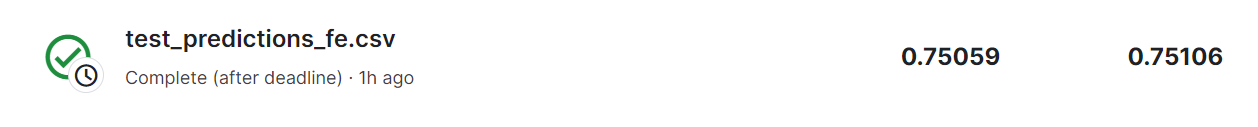

## **Loading other Datasets**

#### Now, it's the time to use the rest of the csv provided to improve our model

In [ ]:
data = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_train.csv'))
test = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/application_test.csv'))

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%
Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 14.60 MB
Decreased by 67.6%


### **bureau.csv**
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample). For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [ ]:
buro = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/bureau.csv'))
buro.head()

Memory usage of dataframe is 222.62 MB
Memory usage after optimization is: 112.95 MB
Decreased by 49.3%


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### **bureau_balance.csv**
Monthly balances of previous credits in Credit Bureau. This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample # of relative previous credits # of months where we have some history observable for the previous credits) rows.

In [ ]:
buro_balance = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/bureau_balance.csv'))
buro_balance.head()

Memory usage of dataframe is 624.85 MB
Memory usage after optimization is: 338.46 MB
Decreased by 45.8%


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### **credit_card_balance.csv**
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample # of relative previous credit cards # of months where we have some history observable for the previous credit card) rows.

In [ ]:
credit_card  = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/credit_card_balance.csv'))
credit_card.head()

Memory usage of dataframe is 673.88 MB
Memory usage after optimization is: 289.33 MB
Decreased by 57.1%


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,Active,0,0


### **POS_CASH_balance.csv**
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample # of relative previous credits # of months in which we have some history observable for the previous credits) rows.

In [ ]:
POS_CASH  = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/POS_CASH_balance.csv'))
POS_CASH.head()

Memory usage of dataframe is 610.43 MB
Memory usage after optimization is: 238.45 MB
Decreased by 60.9%


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### **installments_payments.csv**

In [ ]:
payments = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/installments_payments.csv'))
payments.head()

Memory usage of dataframe is 830.41 MB
Memory usage after optimization is: 311.40 MB
Decreased by 62.5%


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


### **previous_application.csv**

In [ ]:
prev = reduce_memory_usage(pd.read_csv('./home-credit-default-risk/previous_application.csv'))
prev.head()

Memory usage of dataframe is 471.48 MB
Memory usage after optimization is: 309.01 MB
Decreased by 34.5%


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import gc

In [ ]:
#Separate target variable
y = data['TARGET']
del data['TARGET']

In [ ]:
categorical_features = [col for col in data.columns if data[col].dtype == 'object']

one_hot_df = pd.concat([data,test])
one_hot_df = pd.get_dummies(one_hot_df, columns=categorical_features)

data = one_hot_df.iloc[:data.shape[0],:]
test = one_hot_df.iloc[data.shape[0]:,]

print ('train data shape: {}'.format(data.shape))
print ('test data shape: {}'.format(test.shape))

train data shape: (307511, 246)
test data shape: (48744, 246)


## **Preprocessing and Feature Engineering of other datasets**

To gain a deeper understanding of how to engineer features for my machine learning project, I referred to a Kaggle notebook which provided me with valuable insights and techniques for manipulating and creating features.
https://www.kaggle.com/code/bondarroman/homecreditdefaultrisk

### **Feature Engineering of Bureau_balance.csv**



In [ ]:
#Calculates the number of months that each bureau record exists for each loan in the dataset.
buro_grouped_size = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].size()
#Calculates the maximum value of the 'MONTHS_BALANCE' column for each 'SK_ID_BUREAU'.
buro_grouped_max = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].max()
#Calculates the minimum value of the 'MONTHS_BALANCE' column for each 'SK_ID_BUREAU'.
buro_grouped_min = buro_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].min()

'''Counts the number of occurrences of each unique value in the 'STATUS' column for each 'SK_ID_BUREAU' and creates a 
new dataframe where each unique value in the 'STATUS' column becomes a new column in the dataframe'''
buro_counts = buro_balance.groupby('SK_ID_BUREAU')['STATUS'].value_counts(normalize = False)
buro_counts_unstacked = buro_counts.unstack('STATUS')

#Renames the columns of the 'buro_counts_unstacked' dataframe to 'STATUS_0' to 'STATUS_5' and 'STATUS_C' and 'STATUS_X'.
buro_counts_unstacked.columns = ['STATUS_0', 'STATUS_1','STATUS_2','STATUS_3','STATUS_4','STATUS_5','STATUS_C','STATUS_X',]

'''Adds three new columns to the 'buro_counts_unstacked' dataframe representing the number of months each bureau record exists 
for each loan, the minimum value of the 'MONTHS_BALANCE' column, and the maximum value of the 'MONTHS_BALANCE' column'''
buro_counts_unstacked['MONTHS_COUNT'] = buro_grouped_size
buro_counts_unstacked['MONTHS_MIN'] = buro_grouped_min
buro_counts_unstacked['MONTHS_MAX'] = buro_grouped_max

buro = buro.join(buro_counts_unstacked, how='left', on='SK_ID_BUREAU')

del buro_balance
gc.collect()

57895

### **Preprocessing and Feature Engineering of Bureau.csv**


In [ ]:
#Identifies the categorical columns in the 'buro' dataframe by selecting columns with dtype 'object'.
buro_cat_features = [bcol for bcol in buro.columns if buro[bcol].dtype == 'object']
#Creates dummy variables for each categorical column in the 'buro' dataframe and appends them as new columns to the 'buro' dataframe.
buro = pd.get_dummies(buro, columns=buro_cat_features)

"""Creates a new dataframe 'avg_buro' by grouping the 'buro' dataframe by 'SK_ID_CURR' and calculating the mean of each numerical column. 
Also calculates the number of bureau records for each loan and stores it in a new column called 'buro_count'"""

avg_buro = buro.groupby('SK_ID_CURR').mean()
avg_buro['buro_count'] = buro[['SK_ID_BUREAU', 'SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
del avg_buro['SK_ID_BUREAU']

del buro
gc.collect()

21322

### **Preprocessing and Feature Engineering of previous_application.csv**


In [ ]:
#Identifies the categorical columns in the 'prev' dataframe by selecting columns with dtype 'object'.
prev_cat_features = [pcol for pcol in prev.columns if prev[pcol].dtype == 'object']
#Creates dummy variables for each categorical column in the 'prev' dataframe and appends them as new columns to the 'prev' dataframe.
prev = pd.get_dummies(prev, columns=prev_cat_features)
"""Creates a new dataframe 'avg_prev' by grouping the 'prev' dataframe by 'SK_ID_CURR' and calculating the mean of each numerical column. 
Also calculates the number of previous loan applications for each loan and stores it in a new column called 'nb_app'"""
avg_prev = prev.groupby('SK_ID_CURR').mean()
cnt_prev = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']

del prev
gc.collect()

0

### **Preprocessing and Feature Engineering of pos_cash_balance.csv**


In [ ]:
le = LabelEncoder()
#Encodes the 'NAME_CONTRACT_STATUS' column in the 'POS_CASH' dataframe as numerical values using the LabelEncoder module and replaces the original column with the encoded values
POS_CASH['NAME_CONTRACT_STATUS'] = le.fit_transform(POS_CASH['NAME_CONTRACT_STATUS'].astype(str))
#Groups the 'POS_CASH' dataframe by 'SK_ID_CURR' and counts the number of unique values in the 'NAME_CONTRACT_STATUS' column for each group.
nunique_status = POS_CASH[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').nunique()
#Groups the 'POS_CASH' dataframe by 'SK_ID_CURR' and finds the maximum value in the 'NAME_CONTRACT_STATUS' column for each group.
nunique_status2 = POS_CASH[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').max()
#Creates two new columns in the 'POS_CASH' dataframe called 'NUNIQUE_STATUS' and 'NUNIQUE_STATUS2', and assigns the values of 'nunique_status' and 'nunique_status2' respectively.
POS_CASH['NUNIQUE_STATUS'] = nunique_status['NAME_CONTRACT_STATUS']
POS_CASH['NUNIQUE_STATUS2'] = nunique_status2['NAME_CONTRACT_STATUS']
POS_CASH.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis=1, inplace=True)

### **Preprocessing and Feature Engineering of credit_card_balance.csv**


In [ ]:
credit_card['NAME_CONTRACT_STATUS'] = le.fit_transform(credit_card['NAME_CONTRACT_STATUS'].astype(str))
nunique_status = credit_card[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').nunique()
nunique_status2 = credit_card[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']].groupby('SK_ID_CURR').max()
credit_card['NUNIQUE_STATUS'] = nunique_status['NAME_CONTRACT_STATUS']
credit_card['NUNIQUE_STATUS2'] = nunique_status2['NAME_CONTRACT_STATUS']
credit_card.drop(['SK_ID_PREV', 'NAME_CONTRACT_STATUS'], axis=1, inplace=True)

### **Preprocessing and Feature Engineering of install_payments.csv**


In [ ]:
avg_payments = payments.groupby('SK_ID_CURR').mean()
avg_payments2 = payments.groupby('SK_ID_CURR').max()
avg_payments3 = payments.groupby('SK_ID_CURR').min()
del avg_payments['SK_ID_PREV']

del payments
gc.collect()

0

## **Merging the preprocessed datasets**


In [ ]:
data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(POS_CASH.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(POS_CASH.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(credit_card.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(credit_card.groupby('SK_ID_CURR').mean().reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments2.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments2.reset_index(), how='left', on='SK_ID_CURR')

data = data.merge(right=avg_payments3.reset_index(), how='left', on='SK_ID_CURR')
test = test.merge(right=avg_payments3.reset_index(), how='left', on='SK_ID_CURR')

del avg_prev, avg_buro, POS_CASH, credit_card, avg_payments, avg_payments2, avg_payments3
gc.collect()

0

## **Compute correlations and reduce dimensions**


In [ ]:
def compute_correlation(data):
    corrmat = data.corr().abs()
    top_corr_features = corrmat.index
    #plt.figure(figsize=(100, 100))
    #g = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    return corrmat

This function takes a Pandas dataframe as input and computes the correlation matrix using the .corr() method. Then it returns the correlation matrix and the index of the features that have the highest correlation.

In [ ]:
def reducing_dimension(cor_matrix, th=0.7):
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > th)]
    return to_drop

This function takes a correlation matrix and a threshold value as inputs. It then identifies highly correlated features (columns) in the correlation matrix based on the threshold value and returns a list of the features that should be dropped to reduce dimensionality. The function first creates an upper-triangle matrix of the correlation matrix, then identifies the columns that have any correlation value greater than the threshold value. These columns are added to a list and returned by the function.

In [ ]:
corrmat_data = compute_correlation(data)

feature_to_drop = reducing_dimension(corrmat_data)
data_result = data.drop(columns=feature_to_drop)
test_result = test.drop(columns=feature_to_drop)

The highly correlated features are dropped because they provide redundant information, and keeping them can lead to issues like noise, overfitting, and increased computational time.

## **Training Final Model**


In [ ]:
#from lightgbm import LGBMClassifier`: importing the LightGBM Classifier from the LightGBM package
from lightgbm import LGBMClassifier
#importing the regular expressions package
import re
#removing any special characters from the column names in the data and test 
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#creating a KFold cross-validation object with 5 splits, shuffling the data, and setting a random seed
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
#creating an array of zeros with the same number of rows as the data DataFrame and storing it in oof_preds and the same with test
oof_preds = np.zeros(data.shape[0])
sub_preds = np.zeros(test.shape[0])
#creating an empty DataFrame to store the feature importances of the model
feature_importance_df = pd.DataFrame()
#creating a list of all column names in data except for 'SK_ID_CURR', which is being excluded as it is not a feature
feats = [f for f in data.columns if f not in ['SK_ID_CURR']]

In [ ]:
#Loop over the k-fold splits and get the training and validation indices for each fold.
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data)):
    #Get the training features and labels for the current fold.
    trn_x, trn_y = data[feats].iloc[trn_idx], y.iloc[trn_idx]
    #Get the validation features and labels for the current fold.
    val_x, val_y = data[feats].iloc[val_idx], y.iloc[val_idx]
    # Define a LightGBM classifier with specific hyperparameters.
    clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.03,
        num_leaves=34,
        colsample_bytree=0.9,
        subsample=0.8,
        max_depth=8,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=375,
        silent=-1,
        verbose=-1
        )
    # Train the classifier on the training data for the current fold and evaluate its performance on the validation data. Early stopping is used to prevent overfitting.
    clf.fit(trn_x, trn_y, eval_set= [(trn_x, trn_y), (val_x, val_y)],eval_metric='auc', verbose=100, early_stopping_rounds=100)
    #Store the out-of-fold (oof) predictions of the validation set for this fold.
    oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
    # Add the predictions of the test set for this fold to the overall predictions and divide by the number of folds.
    sub_preds += clf.predict_proba(test[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    
    fold_importance_df = pd.DataFrame()
    #Add the feature names to the dataframe.
    fold_importance_df["feature"] = feats
    #Add the feature importances to the dataframe.
    fold_importance_df["importance"] = clf.feature_importances_
    #Add the fold number to the dataframe.
    fold_importance_df["fold"] = n_fold + 1
    # Concatenate the feature importance dataframe for this fold with the overall feature importance dataframe.
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    del clf, trn_x, trn_y, val_x, val_y
    gc.collect()

[100]	training's auc: 0.77778	training's binary_logloss: 0.242584	valid_1's auc: 0.762633	valid_1's binary_logloss: 0.248461
[200]	training's auc: 0.794595	training's binary_logloss: 0.235391	valid_1's auc: 0.775063	valid_1's binary_logloss: 0.243488
[300]	training's auc: 0.803361	training's binary_logloss: 0.231705	valid_1's auc: 0.779934	valid_1's binary_logloss: 0.241632
[400]	training's auc: 0.809718	training's binary_logloss: 0.229163	valid_1's auc: 0.782664	valid_1's binary_logloss: 0.24065
[500]	training's auc: 0.815286	training's binary_logloss: 0.226947	valid_1's auc: 0.784254	valid_1's binary_logloss: 0.240087
[600]	training's auc: 0.820126	training's binary_logloss: 0.225035	valid_1's auc: 0.785202	valid_1's binary_logloss: 0.23971
[700]	training's auc: 0.824123	training's binary_logloss: 0.223423	valid_1's auc: 0.785841	valid_1's binary_logloss: 0.23949
[800]	training's auc: 0.827839	training's binary_logloss: 0.221901	valid_1's auc: 0.786421	valid_1's binary_logloss: 0.239

In [ ]:
test['TARGET'] = sub_preds
test[['SK_ID_CURR', 'TARGET']].to_csv('submission_cross.csv', index=False)

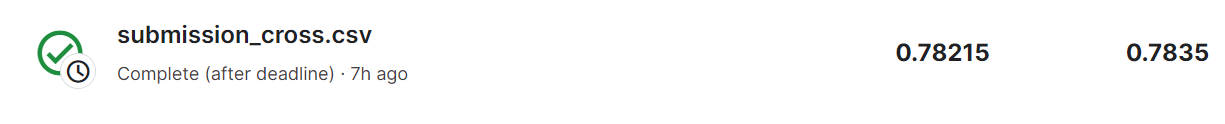

Yayyyy!!!! Scored on the Top 30% of Kaggle Leaderboard.


## **Feature Importance**

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

sorting the "feature_importance_df" dataframe by the "importance" column in descending order, which means the features with higher importance will appear first in the sorted dataframe.

In [ ]:
feature_importance_df.head(60)

,feature,importance,fold
29,EXT_SOURCE_3,750,3
29,EXT_SOURCE_3,712,2
29,EXT_SOURCE_3,706,4
28,EXT_SOURCE_2,692,2
28,EXT_SOURCE_2,688,3
6,DAYS_BIRTH,674,3
27,EXT_SOURCE_1,667,3
29,EXT_SOURCE_3,658,1
27,EXT_SOURCE_1,654,2
29,EXT_SOURCE_3,633,5


These features play a main role in prdeicting if the customer will be able to repay the loan.

## **Summary**

In this notebook we explored Supervised Machine Learning methods. Classification models such as logistic regression, decision tree and ensemble models such as RandomForest, XGBoost, LightGBM were trained to predict the default loaner using **Scikit Learn**, **LightGBM** and **XGBoost**.  We used **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** and **Plotly** to perform the exploratory data analysis and gather insights for machine learning.

- There are a total of 9 files:
1 main file- application_train.csv for training (with target),
1 main file for testing - application_test.csv (without the target),
1 example submission file - sample_submission.csv, and
6 other files containing additional information about each loan.
Let's get started with the given train and test data.

- Our Application dataset had ( train = 307511, test = 48,744) rows and 122 columns. 

-  We prepared the data by merging features with the train and test data sets, split the train data into train and val sets (80:20), imputed missing values , encoded categorical values ( `Type` - OneHot Encoding, `IsHoliday` : 0 & 1) and scaled the values using MinMaxScaler.

- We performmed a detailed exploratory data analysis and found that there are few features from external sources that are hughly correlated with the target variable and also tried to understand the domain features in the process.

- I experimented with different classification models to predict the target variable. Initially, I started with logistic regression as a baseline model, but the score I obtained was just above the score of a random guess, which was not promising.

- Next, I tried decision trees, which outperformed logistic regression due to their ability to capture non-linear relationships in the data. The score I obtained with the decision tree was better than logistic regression, but there was still room for improvement.

- Therefore, I tried ensemble models such as random forests, which use multiple decision trees to improve the performance of the model. The random forest model gave a better score than the decision tree model because it reduces overfitting and captures more complex interactions among the features.

- Further, I experimented with XGBoost, which is a popular gradient boosting technique that improves on random forests by creating trees sequentially and correcting the errors of previous trees. XGBoost performed exceptionally well compared to the previous models due to its ability to handle complex non-linear relationships and large datasets.

- Lastly, I tried LGBM classifier, which is a light gradient boosting technique that is faster and more efficient than XGBoost. LGBM gave the best score compared to all models because it uses a novel approach to decision tree splitting and reduces computation time.

- **LGBM Classifier** performed the best with considering only Application train dataset with simple inputs and no hyperparameter tuning or feature engineering with a score of 0.746 **(Top 80% of the kaggle public leaderboard)**

- **LGBM Classifier with feature engineering and cross validation** considering only Application train dataset with all inputs and hyperparameter tuning and basic feature engineering with a score of 0.756097 **(Top 68% of the kaggle public leaderboard)**

- **LGBM Classifier with feature engineering and cross validation** considering only all the datasets with all inputs and hyperparameter tuning and basic feature engineering with a score of 0.783 **(Top 35% of the kaggle public leaderboard)**

- **Best 10 predictors** of loan defaulters are
   - external sources (EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3)
   - DAYS_BIRTH
   - AMT_CREDIT
   - AMT_PAYMENT
   - AMT_CREDIT_SUM_DEBT
   - AMT_ANNUITY
   - AMT_GOODS_PRICE
   - CNT_INSTALLMENT_FUTURE
   - CNT_PAYMENT
   - DAYS_ENTRY_PAYMENT



## **Future Works**

- Feature Selection: Look at the importance of the features used in your model and consider removing features that are not contributing much to the model's performance. This can help to reduce overfitting and improve the generalization of the model.

- Feature Engineering: Consider creating new features based on domain knowledge or insights gained from exploratory data analysis. This can help to capture more complex relationships and improve the performance of the model.

- Regularization: Consider using regularization techniques such as L1 or L2 regularization to prevent overfitting and improve the generalization of the model.

- Advanced Ensemble Techniques: Consider using more advanced ensemble techniques such as Stacking, where multiple models are combined to improve the overall performance.

- Try different optimization techniques such as Random Search, Bayesian Optimization, Gradient-Based Optimization (e.g., Stochastic Gradient Descent, Adam) for improving the performance of your home loan default prediction model

- Deployment of model and hosting on website 




## **References**

**Tutorials**  
Logistic Regression with Scikit-Learn [Jovian Aakash N S ](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/logistic-regression-with-scikit-learn)  
How to approach Machine Learning Problems [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/how-to-approach-machine-learning-problems)  


**Documentation**  
Scikit Learn Supervised Learning [documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
Light GBM [documentation](https://lightgbm.readthedocs.io/en/latest/)  
XGBoost [documentation](https://xgboost.readthedocs.io/en/latest/)

**Books, Blogs and Kaggle Kernels**  

Start Here: A Gentle Introduction[Kaggle Notebook](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction)

Home Credit : Complete EDA + Feature Importance ??[Kaggle Notebook](https://www.kaggle.com/code/codename007/home-credit-complete-eda-feature-importance)

HOME CREDIT DEFAULT RISK — An End to End ML Case Study — PART 1: Introduction and EDA [Read Blog](https://medium.com/thecyphy/home-credit-default-risk-part-1-3bfe3c7ddd7a)

Home Credit Default Risk (Part 1) : Business Understanding, Data Cleaning and EDA[Read Blog] (https://medium.com/analytics-vidhya/home-credit-default-risk-part-1-business-understanding-data-cleaning-and-eda-1203913e979c)

Discover Feature Engineering, How to Engineer Features and How to Get Good at It [Read Article](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)

Home Credit Default Risk- End to End Machine learning project [Medium blog](https://medium.com/@praveenkotha/home-credit-default-risk-end-to-end-machine-learning-project-1871f52e3ef2)

HomeCreditDefaultRisk [Kaggle Notebook](https://www.kaggle.com/code/bondarroman/homecreditdefaultrisk)



I am truly grateful for the knowledge and insights that I gained from the blogs, articles, and Kaggle notebooks that I came across during my project. I also want to extend a special thanks to ChatGPT, which was instrumental in helping me navigate through various challenges and roadblocks that I encountered along the way. 